In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats.mstats import gmean
import math
import enum;
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, NuSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import multilabel_confusion_matrix
import pylab 
import scipy.stats as stats

In [ ]:
pip install --upgrade xlrd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
core_7RO = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-RO-14-BA/Core 7-RO-14-BA SER.xlsx"
core_7RO = pd.read_excel(core_7RO)

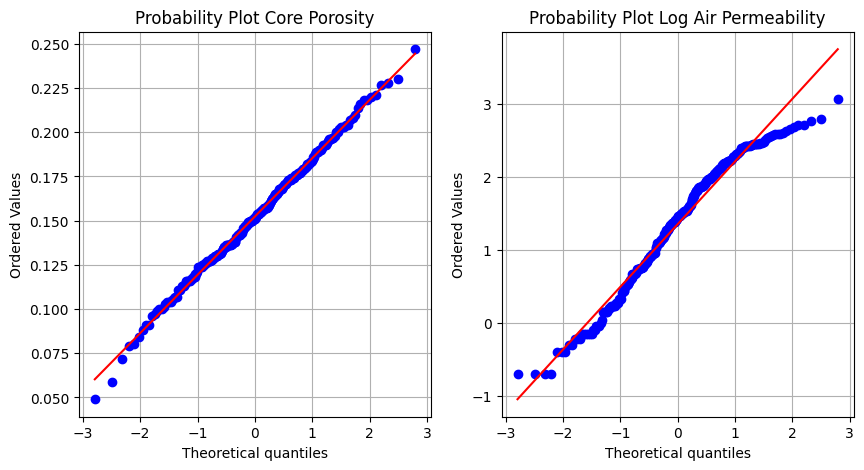

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(core_7RO["Poro_Core"], dist="norm", plot=pylab)
plt.title("Probability Plot Core Porosity")
plt.subplot(1,2,1).grid()

plt.subplot(1,2,2)
stats.probplot(np.log10(core_7RO["Kh_mD"]), dist="norm", plot=pylab)
plt.title("Probability Plot Log Air Permeability")
plt.subplot(1,2,2).grid()
pylab.show()

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         264 non-null    float64
 1   Poro_Core  264 non-null    float64
 2   Kh_mD      264 non-null    float64
 3   RQI        264 non-null    float64
 4   Poro_norm  264 non-null    float64
 5   FZI        264 non-null    float64
dtypes: float64(6)
memory usage: 12.5 KB


In [ ]:
core_7RO.describe()

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1158.401288,0.152362,87.940227,0.560373,0.181515,3.028286
std,45.881343,0.032802,136.373325,0.447599,0.045886,2.284508
min,1091.050000,0.049000,0.200000,0.037801,0.051525,0.236120
25%,1122.257500,0.130000,5.475000,0.199620,0.149425,1.088124
50%,1152.150000,0.151500,27.950000,0.428162,0.178551,2.547414
75%,1178.937500,0.174000,117.050000,0.833850,0.210654,4.448192
max,1260.520000,0.247000,1157.000000,2.582845,0.328021,12.521510


In [ ]:
registro_7RO = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-RO-14-BA/7-RO-14-BA.las"
registro_7RO = np.loadtxt(registro_7RO,skiprows=58)
registro_7RO[registro_7RO==-999.0000]=np.nan
registro_7RO = pd.DataFrame(registro_7RO,columns=["MD","GR","CAL","SP","VCL","RSHAL","RDEEP","RHOB","CNSS",
                                                    "DRHO","PHIT","PHIE"])

In [ ]:
registro_7RO["RHOB"] = registro_7RO["RHOB"]/1000

<ipython-input-7-ba3ca6c5dbc2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


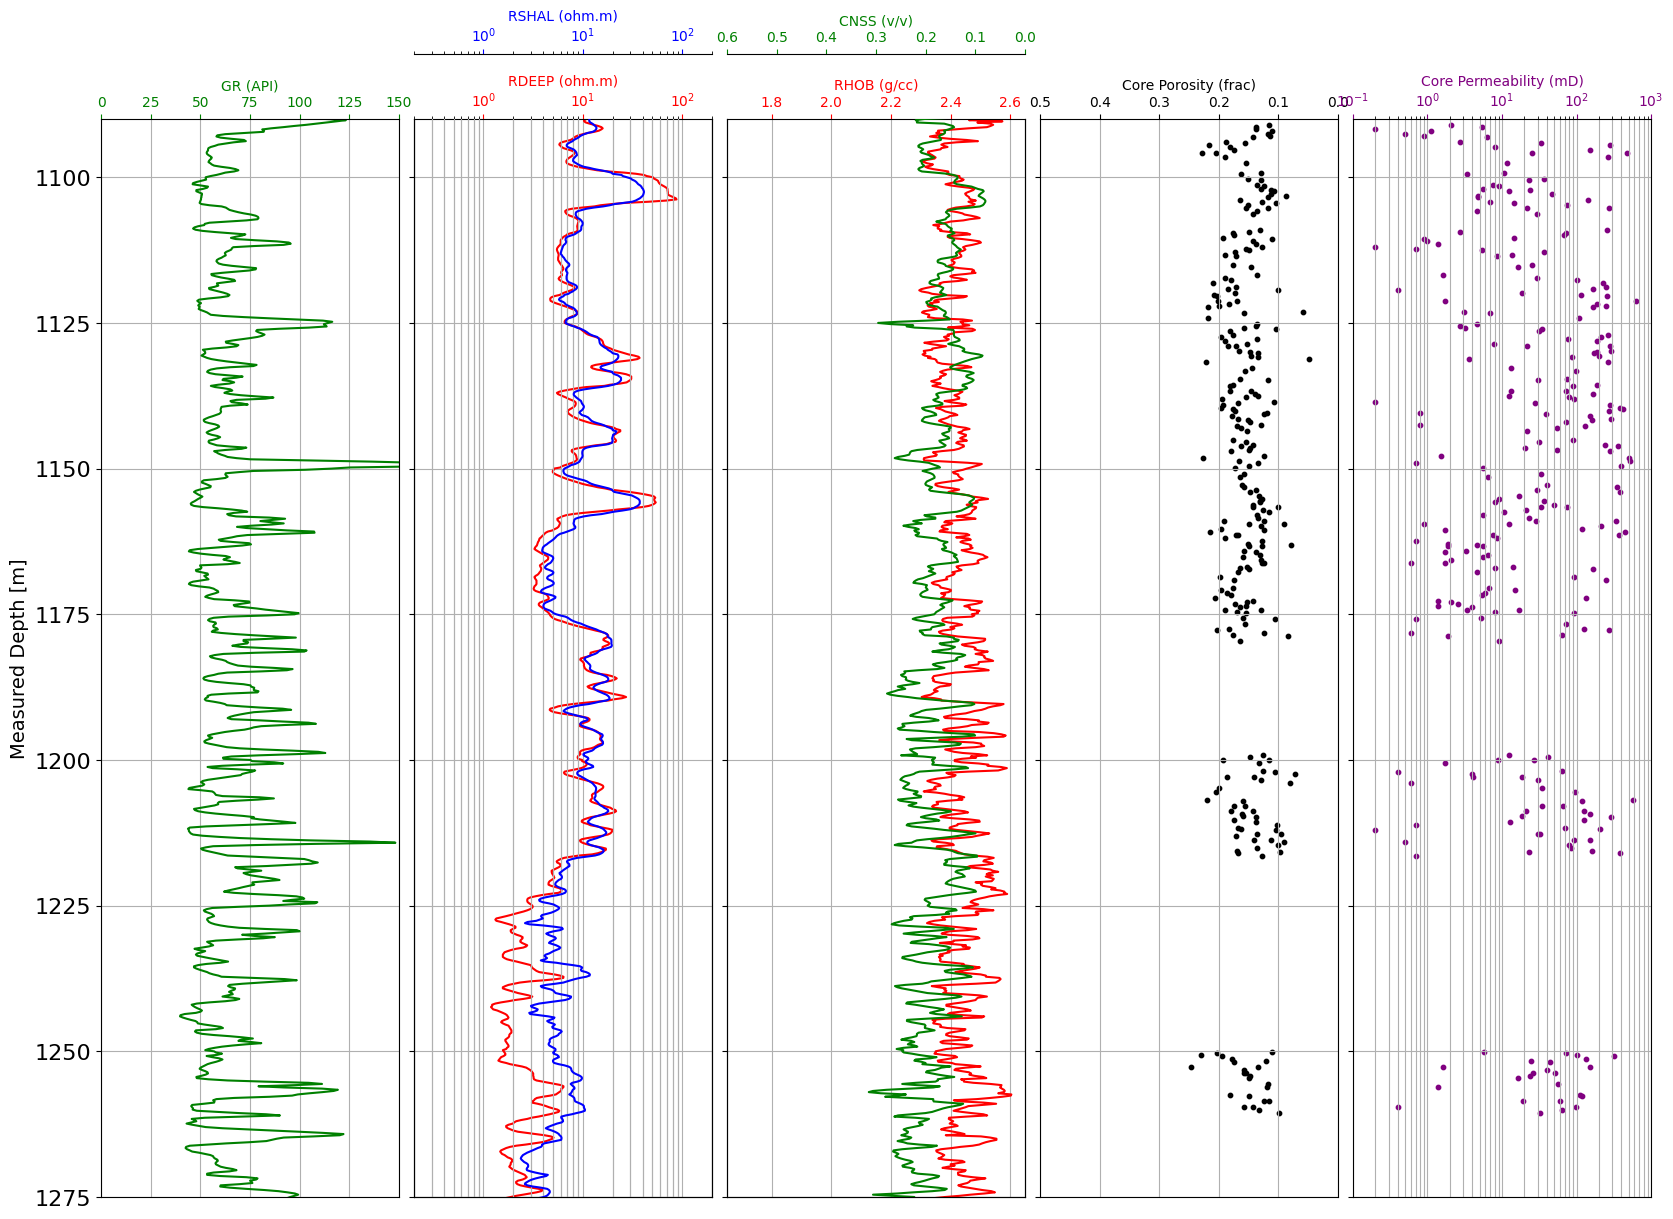

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,14),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

ax6.scatter("Poro_Core","MD",data=core_7RO,color="black",s=10)
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

ax7.scatter("Kh_mD","MD",data=core_7RO,color="purple",s=10)
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.06))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
Well_7RO = pd.merge(core_7RO,registro_7RO,how="outer",on="MD")
Well_7RO = Well_7RO.sort_values(by="MD")
Well_7RO.reset_index(inplace=True,drop=True)
Well_7RO.drop(["RQI","Poro_norm","SP","RSHAL"],inplace=True,axis=1)
Well_7RO = Well_7RO[(1090<=Well_7RO["MD"])&(Well_7RO["MD"]<=1261)]
Well_7RO

,MD,Poro_Core,Kh_mD,FZI,GR,CAL,VCL,RDEEP,RHOB,CNSS,DRHO,PHIT,PHIE
589,1090.00,NaN,NaN,NaN,113.088,9.903,0.5211,10.909,2.524999,0.2027,0.108,0.1209,0.1005
590,1090.20,NaN,NaN,NaN,123.197,10.702,0.5732,10.282,2.462000,0.2201,0.139,0.1526,0.1345
591,1090.40,NaN,NaN,NaN,118.495,10.075,0.5489,10.313,2.573999,0.2168,0.099,0.1026,0.0771
592,1090.60,NaN,NaN,NaN,113.323,10.781,0.5223,10.721,2.490000,0.2177,0.020,0.1399,0.1205
593,1090.80,NaN,NaN,NaN,108.621,10.702,0.4980,11.724,2.533999,0.1627,0.002,0.1049,0.0891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,1260.40,NaN,NaN,NaN,58.542,9.589,0.2627,5.705,2.438000,0.1871,0.039,0.1550,0.1433
1690,1260.52,0.099,32.8,5.201619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,1260.60,NaN,NaN,NaN,69.592,9.574,0.3180,5.172,2.471000,0.2008,0.031,0.1440,0.1282
1692,1260.80,NaN,NaN,NaN,82.994,9.574,0.3850,4.639,2.509999,0.2271,0.018,0.1339,0.1121


In [ ]:
GR = list(Well_7RO["GR"])
RT = list(Well_7RO["RDEEP"])
RHOB = list(Well_7RO["RHOB"])
NPHI = list(Well_7RO["CNSS"])
CAL = list(Well_7RO["CAL"])
VCL = list(Well_7RO["VCL"])
DRHO = list(Well_7RO["DRHO"])
PHIE = list(Well_7RO["PHIE"])
PHIT = list(Well_7RO["PHIT"])

In [ ]:
for i in range(0,len(GR)):
    if math.isnan(GR[i]):
        GR[i] = gmean([GR[i-1],GR[i+1]])
        if math.isnan(GR[i+1]):
            GR[i] = gmean([GR[i-1],GR[i+2]])

for i in range(0,len(RT)):
    if math.isnan(RT[i]):
        RT[i] = gmean([RT[i-1],RT[i+1]])
        if math.isnan(RT[i+1]):
            RT[i] = gmean([RT[i-1],RT[i+2]])

for i in range(0,len(RHOB)):
    if math.isnan(RHOB[i]):
        RHOB[i] = gmean([RHOB[i-1],RHOB[i+1]])
        if math.isnan(RHOB[i+1]):
            RHOB[i] = gmean([RHOB[i-1],RHOB[i+2]])

for i in range(0,len(NPHI)):
    if math.isnan(NPHI[i]):
        NPHI[i] = gmean([NPHI[i-1],NPHI[i+1]])
        if math.isnan(NPHI[i+1]):
            NPHI[i] = gmean([NPHI[i-1],NPHI[i+2]])

for i in range(0,len(CAL)):
    if math.isnan(CAL[i]):
        CAL[i] = gmean([CAL[i-1],CAL[i+1]])
        if math.isnan(CAL[i+1]):
            CAL[i] = gmean([CAL[i-1],CAL[i+2]])

for i in range(0,len(VCL)):
    if math.isnan(VCL[i]):
        VCL[i] = gmean([VCL[i-1],VCL[i+1]])
        if math.isnan(VCL[i+1]):
            VCL[i] = gmean([VCL[i-1],VCL[i+2]])

for i in range(0,len(DRHO)):
    if math.isnan(DRHO[i]):
        DRHO[i] = gmean([DRHO[i-1],DRHO[i+1]])
        if math.isnan(DRHO[i+1]):
            DRHO[i] = gmean([DRHO[i-1],DRHO[i+2]])

for i in range(0,len(PHIE)):
    if math.isnan(PHIE[i]):
        PHIE[i] = gmean([PHIE[i-1],PHIE[i+1]])
        if math.isnan(PHIE[i+1]):
            PHIE[i] = gmean([PHIE[i-1],PHIE[i+2]])

for i in range(0,len(PHIT)):
    if math.isnan(PHIT[i]):
        PHIT[i] = gmean([PHIT[i-1],PHIT[i+1]])
        if math.isnan(PHIT[i+1]):
            PHIT[i] = gmean([PHIT[i-1],PHIT[i+2]])

In [ ]:
Well_7RO["GR"] = GR
Well_7RO["RDEEP"] = RT
Well_7RO["RHOB"] = RHOB
Well_7RO["CNSS"] = NPHI
Well_7RO["CAL"] = CAL
Well_7RO["VCL"] = VCL
Well_7RO["DRHO"] = DRHO
Well_7RO["PHIE"] = PHIE
Well_7RO["PHIT"] = PHIT

In [ ]:
Well_7RO.isna().sum()

MD             0
Poro_Core    841
Kh_mD        841
FZI          841
GR             0
CAL            0
VCL            0
RDEEP          0
RHOB           0
CNSS           0
DRHO           0
PHIT           0
PHIE           0
dtype: int64

In [ ]:
Well_7RO = Well_7RO.dropna()

In [ ]:
Well_7RO.reset_index(inplace=True,drop=True)
Well_7RO

,MD,Poro_Core,Kh_mD,FZI,GR,CAL,VCL,RDEEP,RHOB,CNSS,DRHO,PHIT,PHIE
0,1091.05,0.116,2.1,1.018133,100.109851,10.019481,0.454177,13.636849,2.538495,0.149490,0.006481,0.099246,0.084783
1,1091.42,0.137,5.4,1.241814,88.583785,9.785472,0.394736,15.625233,2.490806,0.145477,0.033764,0.117483,0.105562
2,1091.79,0.138,0.2,0.236120,83.316568,9.769497,0.367620,15.577448,2.433861,0.151119,0.023875,0.142183,0.130863
3,1092.09,0.111,1.1,0.791668,81.935416,9.800997,0.360500,13.774143,2.359499,0.162247,0.029732,0.174849,0.163200
4,1092.62,0.117,0.5,0.489888,60.507505,10.514394,0.249988,9.533145,2.364472,0.168071,0.045902,0.177460,0.167952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1258.60,0.116,59.6,5.423980,57.132000,9.715000,0.255700,3.103000,2.436999,0.183900,0.023000,0.154600,0.143300
260,1259.52,0.157,0.4,0.269115,45.610395,9.643997,0.198047,4.417211,2.454994,0.148453,0.046540,0.136739,0.128498
261,1259.61,0.142,99.6,5.024746,46.080898,9.628497,0.200396,4.791475,2.443491,0.160025,0.043589,0.145136,0.136287
262,1260.03,0.133,64.3,4.500666,47.127637,9.596997,0.205632,5.672623,2.416491,0.176310,0.039115,0.161702,0.152850


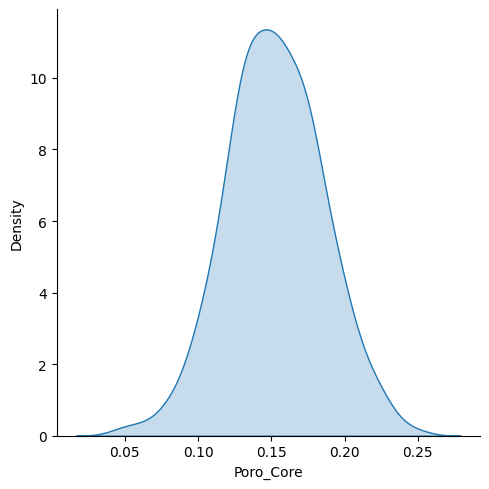

In [ ]:
sns.displot(data=core_7RO,x=core_7RO["Poro_Core"],kind="kde",fill=True)

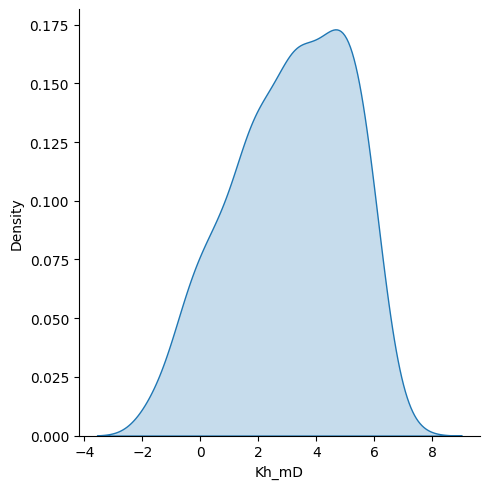

In [ ]:
sns.displot(data=core_7RO,x=np.log(core_7RO["Kh_mD"]),kind="kde",fill=True)

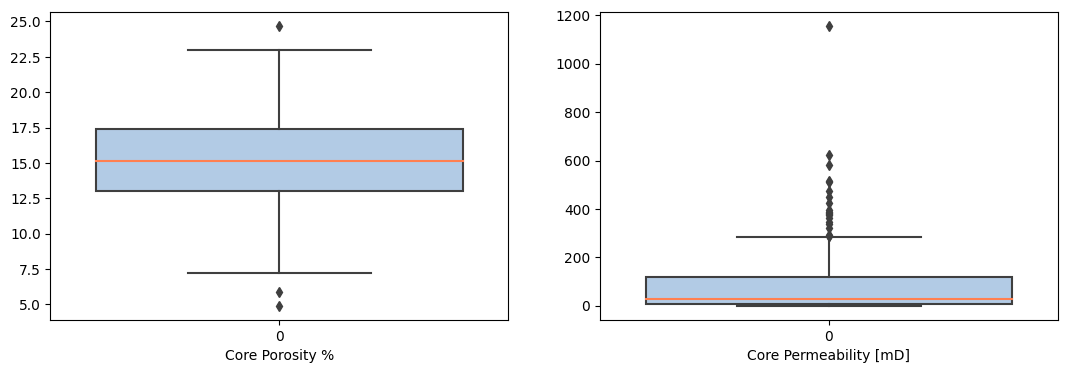

In [ ]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(core_7RO["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %");

plt.subplot(1,2,2)
sns.boxplot(core_7RO["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Permeability [mD]");

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         264 non-null    float64
 1   Poro_Core  264 non-null    float64
 2   Kh_mD      264 non-null    float64
 3   RQI        264 non-null    float64
 4   Poro_norm  264 non-null    float64
 5   FZI        264 non-null    float64
dtypes: float64(6)
memory usage: 12.5 KB


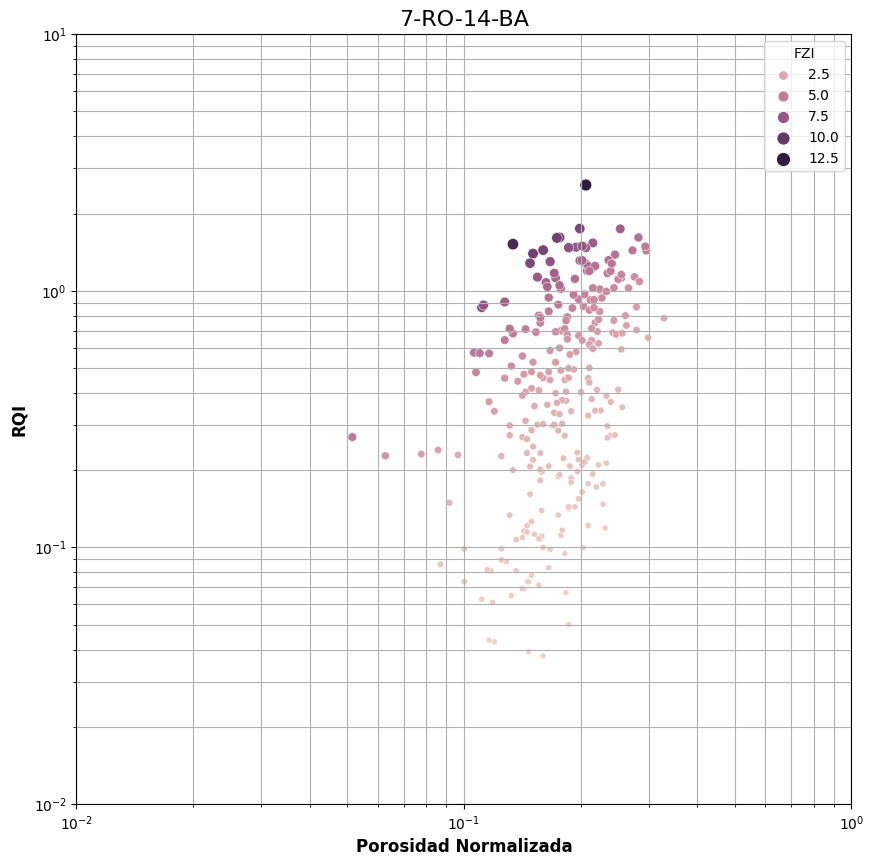

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x=core_7RO["Poro_norm"],y=core_7RO["RQI"],hue=core_7RO["FZI"],size=core_7RO["FZI"])
p.set_title("7-RO-14-BA",fontsize=16)
p.set_xlabel("Porosidad Normalizada", fontsize=12, fontweight="bold")
p.set_ylabel("RQI", fontsize=12,fontweight="bold")
p.semilogy()
p.semilogx()
p.set_ylim(0.01,10)
p.set_xlim(0.01,1)
p.grid(which="both");

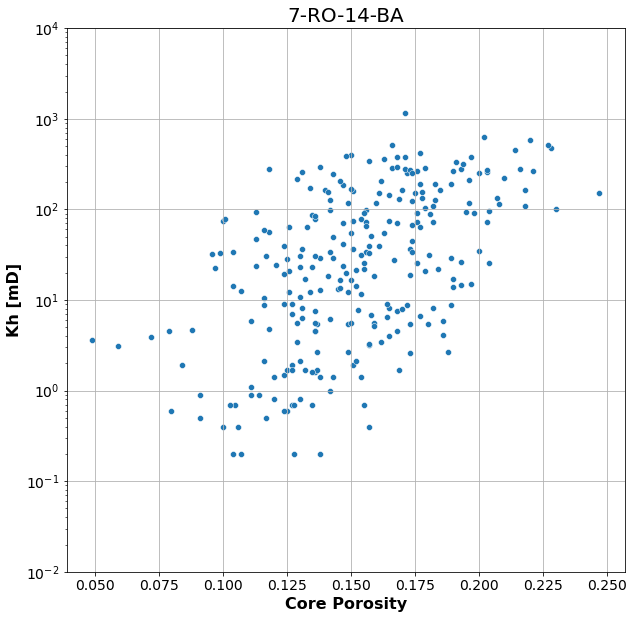

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x=core_7RO['Poro_Core'],y=core_7RO["Kh_mD"])
p.set_title("7-RO-14-BA",fontsize=20)
p.set_xlabel("Core Porosity", fontsize=16, fontweight="bold")
p.set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
p.set_yscale(value="log")
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_ylim(0.01,10000)
# p.set_ylim(2040,1920)
p.grid(which="major");

#Unidades

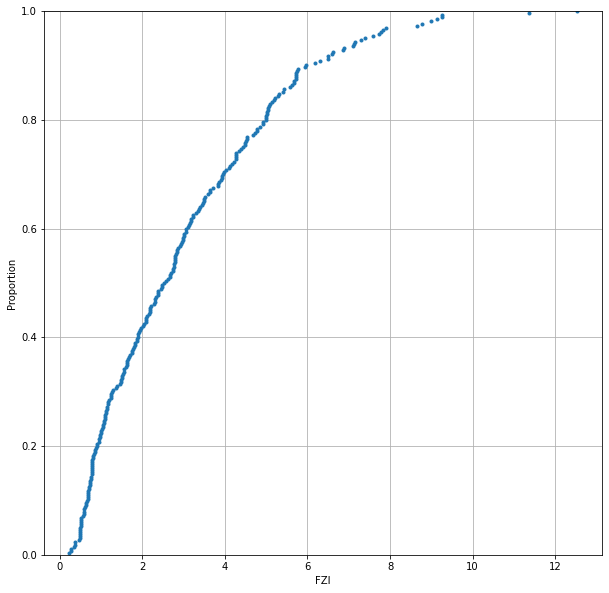

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.ecdfplot(data=core_7RO, x="FZI",marker=".",linestyle="none")
p.grid();

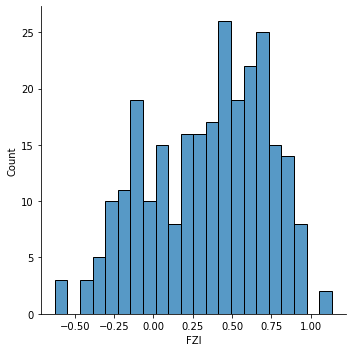

In [ ]:
sns.displot(data=core_7RO,x=np.log10(core_7RO["FZI"]),binwidth=0.08)

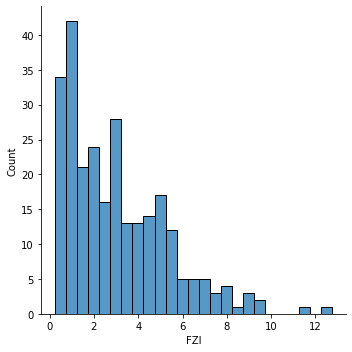

In [ ]:
sns.displot(data=core_7RO,x=core_7RO["FZI"],binwidth=0.5)

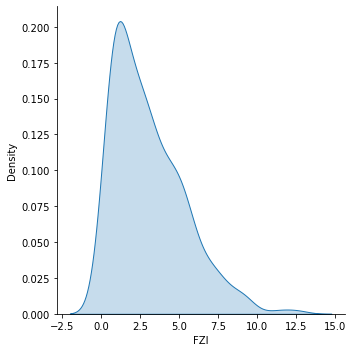

In [ ]:
sns.displot(data=core_7RO,x=core_7RO["FZI"],kind="kde",fill=True)

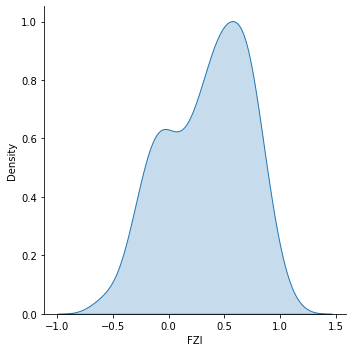

In [ ]:
sns.displot(data=core_7RO,x=np.log10(core_7RO["FZI"]),kind="kde",fill=True)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

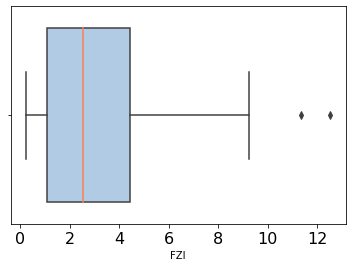

In [ ]:
sns.boxplot(core_7RO["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xticks(fontsize=16)

In [ ]:
core_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         264 non-null    float64
 1   Poro_Core  264 non-null    float64
 2   Kh_mD      264 non-null    float64
 3   RQI        264 non-null    float64
 4   Poro_norm  264 non-null    float64
 5   FZI        264 non-null    float64
dtypes: float64(6)
memory usage: 12.5 KB


In [ ]:
X = core_7RO[["FZI"]]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

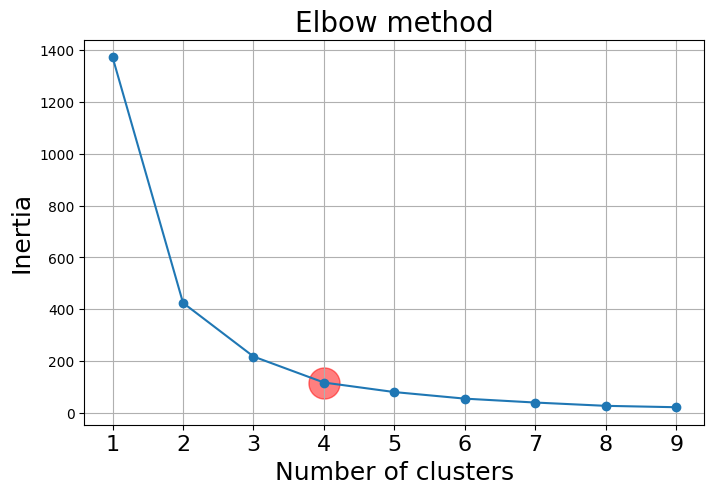

In [ ]:
inertias = []
for i in range(1,10):
 kmeans = KMeans(n_clusters=i , random_state=42)
 kmeans.fit(X)
 inertias.append(kmeans.inertia_)
plt.figure(figsize = (8, 5))
plt.plot(range(1,10), inertias, marker='o')
plt.scatter(4, inertias[3], c='red', s=500, alpha=0.5)
plt.title('Elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(X,kmeans.labels_)

0.5884160842944447

In [ ]:
#Ejecuta el algoritmo varias veces con diferentes clusters y obtenen sus coeficientes de silueta
x2 = np.linspace(2,10,num=9)
y2 = []
for i in range(2,11):
    k = i
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit_predict(X)
    a = silhouette_score(X, kmeans2.labels_)
    y2.append(a)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

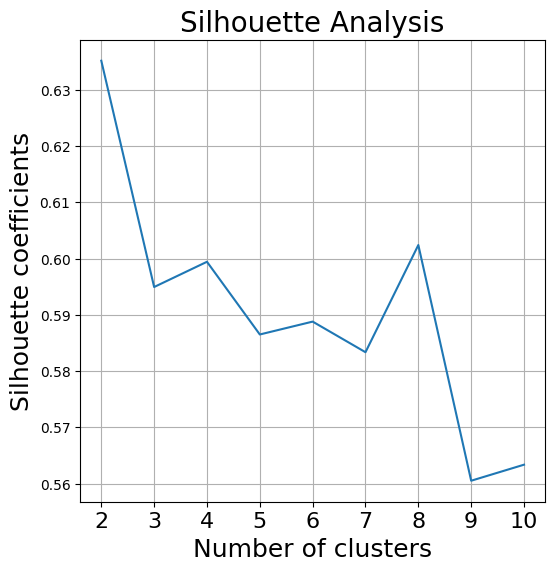

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(x2,y2)
plt.title('Silhouette Analysis', fontsize=20)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Silhouette coefficients', fontsize=18)
plt.xticks(fontsize=16)
plt.grid()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2 La media de silhouette_score es : 0.6351695518663354


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3 La media de silhouette_score es : 0.596952720168802
Para n_clusters = 4 La media de silhouette_score es : 0.5994321815598066


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 5 La media de silhouette_score es : 0.595719282332716


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 6 La media de silhouette_score es : 0.5864707819204253


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 7 La media de silhouette_score es : 0.5962563753057777


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 8 La media de silhouette_score es : 0.6016107348934049


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 9 La media de silhouette_score es : 0.5808396379833757


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 10 La media de silhouette_score es : 0.5633660178427875


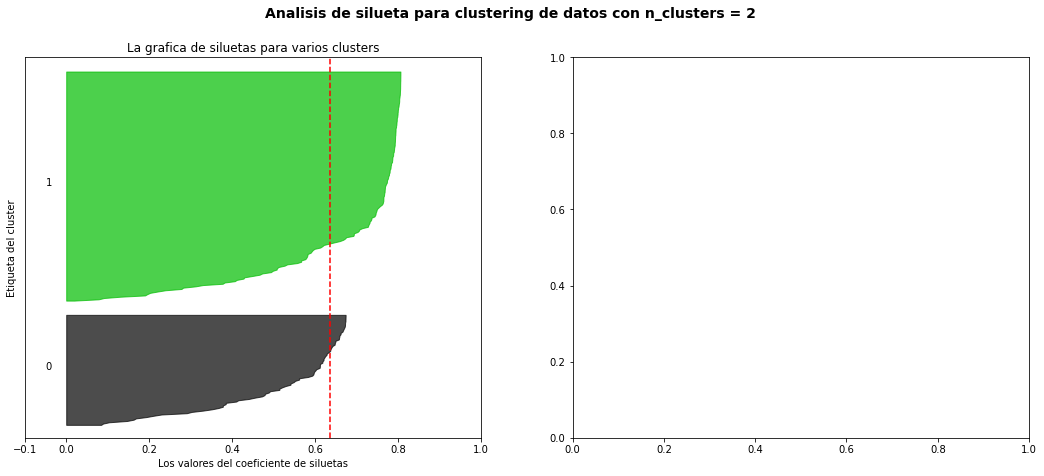

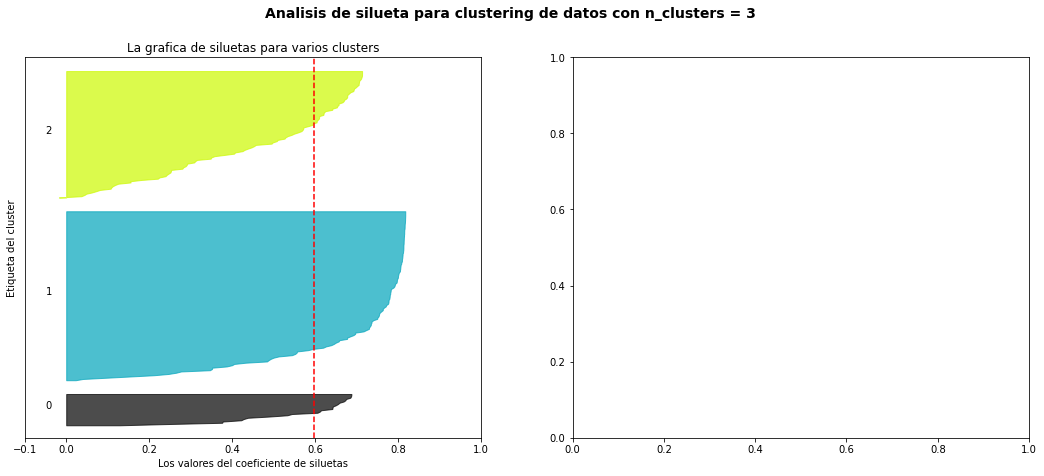

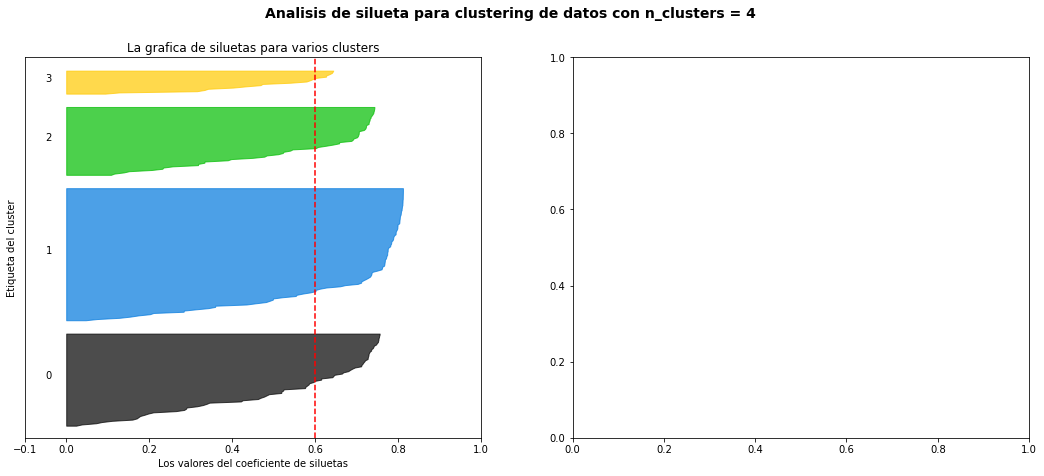

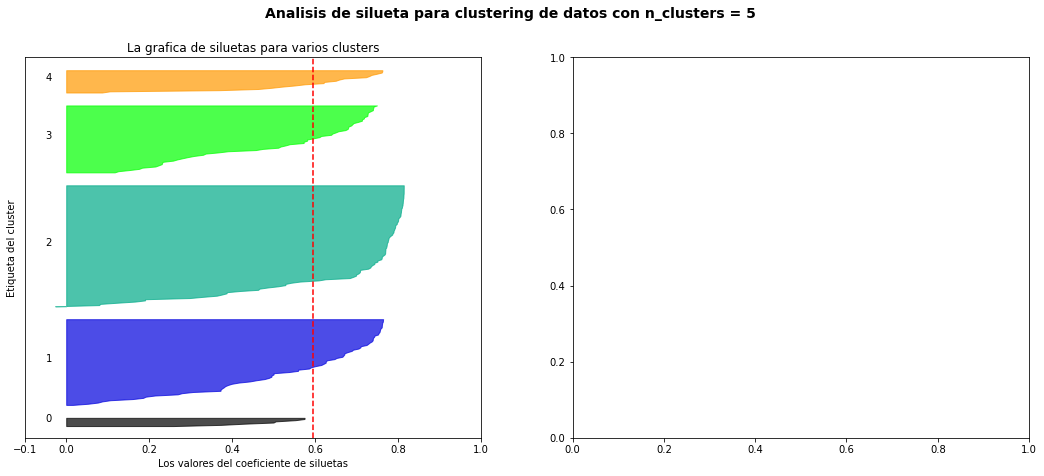

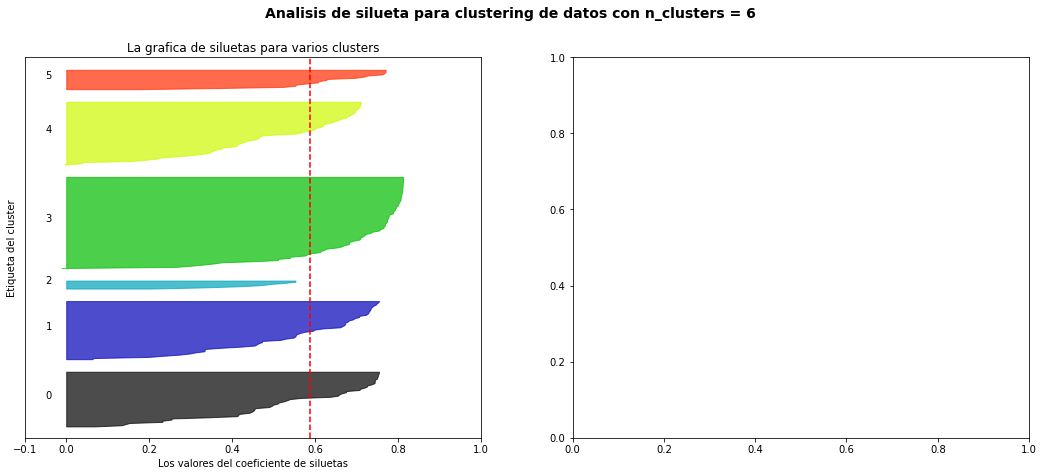

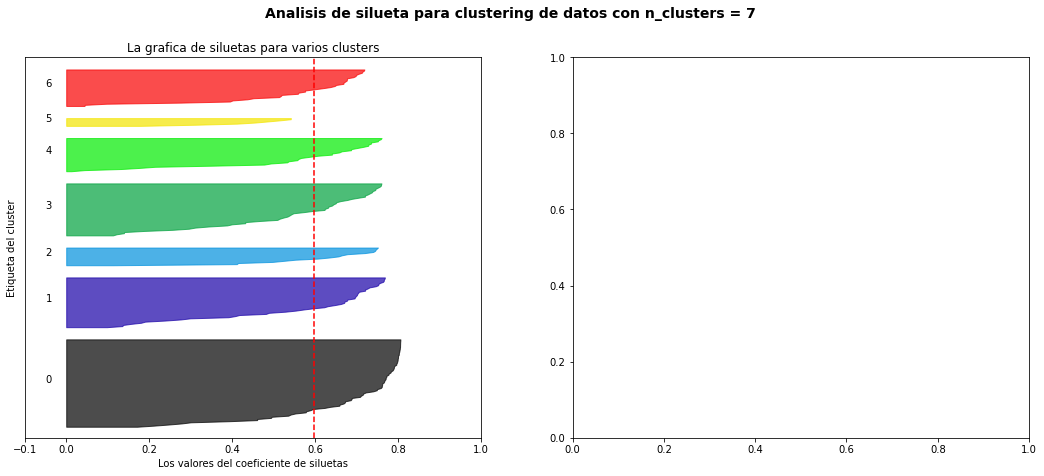

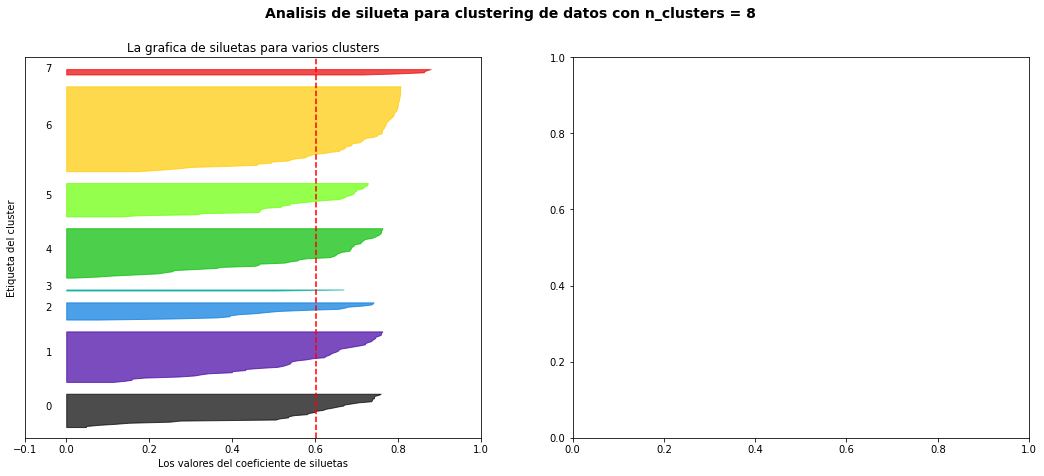

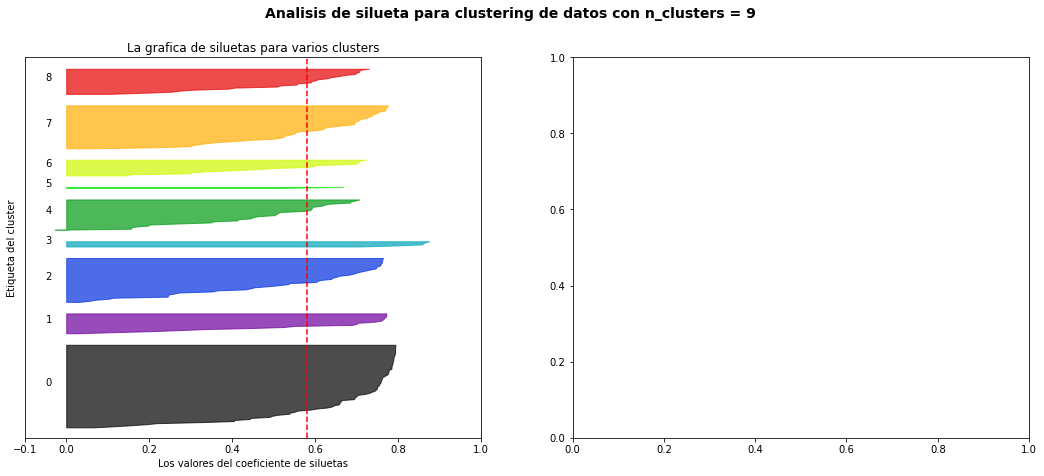

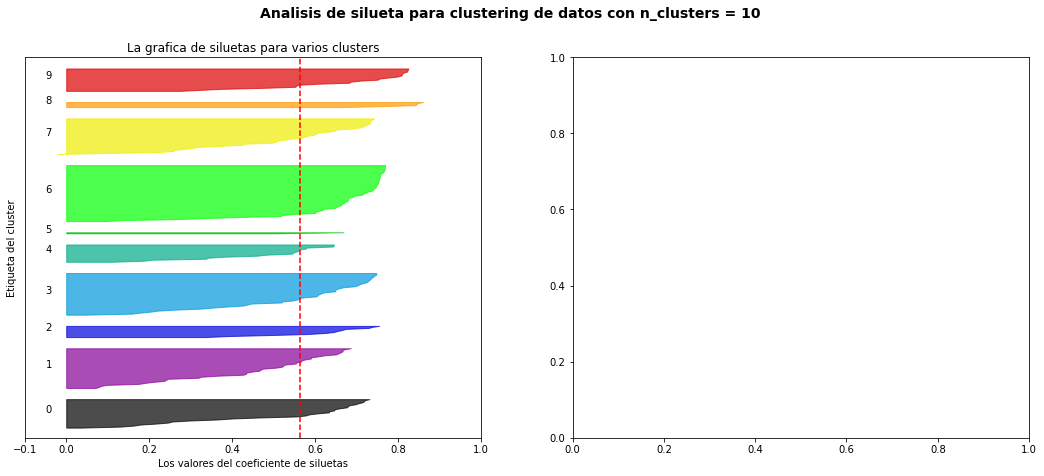

In [ ]:
#Realiza el diagrama de silueta 
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La media de silhouette_score es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("La grafica de siluetas para varios clusters")
    ax1.set_xlabel("Los valores del coeficiente de siluetas")
    ax1.set_ylabel("Etiqueta del cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     X.iloc[:, 0].values, X.iloc[:, 1].values, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # centers = clusterer.cluster_centers_

    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("La grafica de los graficos con su cluster.")

    plt.suptitle(
        "Analisis de silueta para clustering de datos con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4,random_state=0)
gmm.fit(X)
core_7RO["Gaussian_HFU"] = gmm.predict(X)

In [ ]:
# core_7RO.drop(["Gaussian_HFU"],axis=1,inplace=True)

In [ ]:
SergiHFU = {0:"1",3:"2",1:"3",2:"4"}
core_7RO = core_7RO.replace({"Gaussian_HFU":SergiHFU})

<ipython-input-26-46b579e123a4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


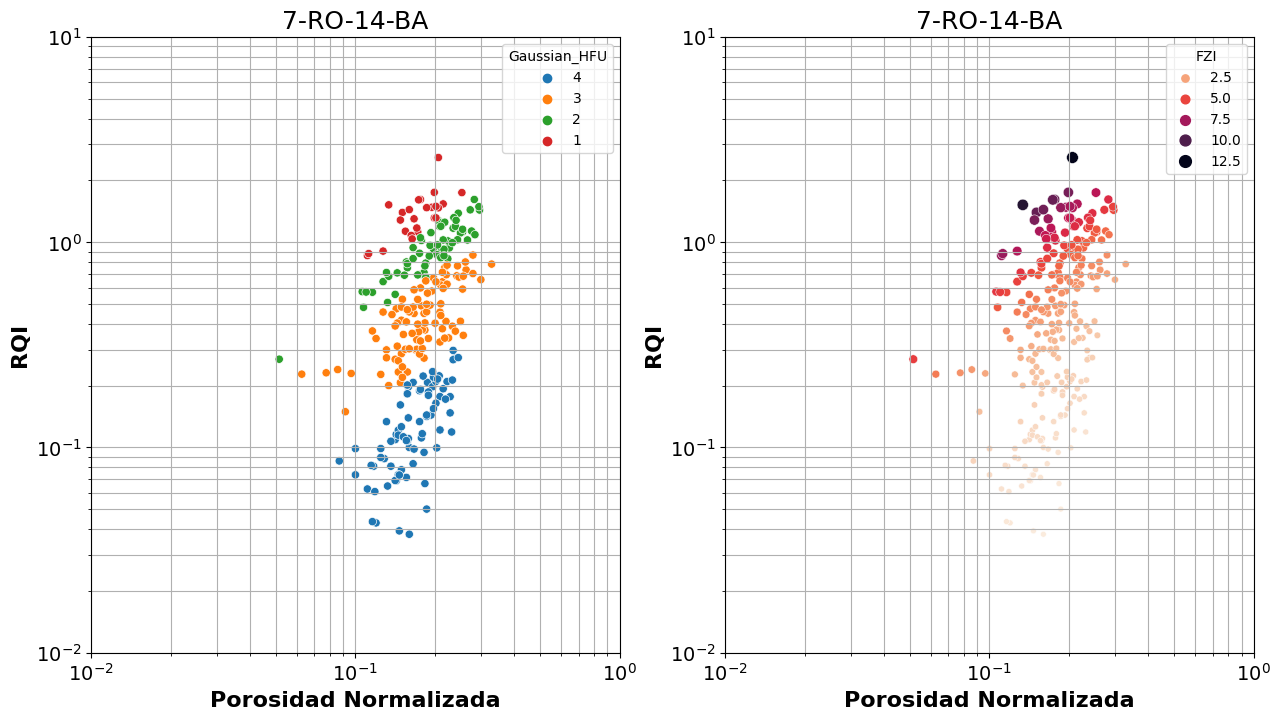

In [ ]:
fig , p = plt.subplots(figsize=(15,8))

plt.subplot(1,2,1)
p = sns.scatterplot(x=core_7RO["Poro_norm"],y=core_7RO["RQI"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
p.set_title("7-RO-14-BA",fontsize=18)
p.set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
p.set_ylabel("RQI", fontsize=16,fontweight="bold")
p.semilogy()
p.semilogx()
p.set_ylim(0.01,10)
p.set_xlim(0.01,1)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both");

plt.subplot(1,2,2)
p = sns.scatterplot(x=core_7RO["Poro_norm"],y=core_7RO["RQI"],hue=core_7RO["FZI"],size=core_7RO["FZI"],palette="rocket_r")
p.set_title("7-RO-14-BA",fontsize=18)
p.set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
p.set_ylabel("RQI", fontsize=16,fontweight="bold")
p.semilogy()
p.semilogx()
p.set_ylim(0.01,10)
p.set_xlim(0.01,1)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both");

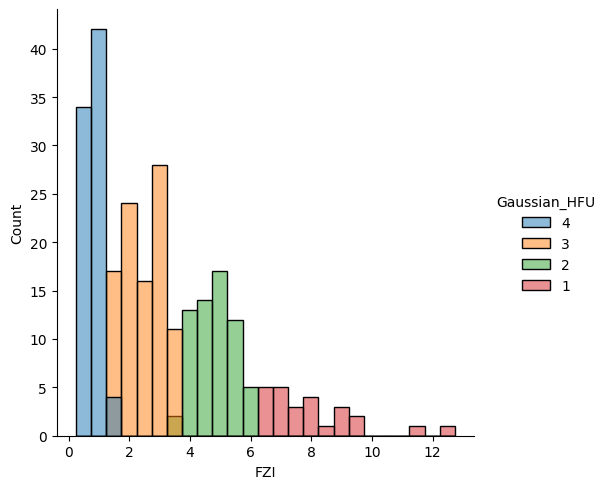

In [ ]:
sns.displot(data=core_7RO,x=core_7RO["FZI"],hue=core_7RO["Gaussian_HFU"],binwidth=0.5,palette="tab10")

In [ ]:
Unidad1 = core_7RO[(core_7RO["Gaussian_HFU"]=="1")]
Unidad2 = core_7RO[(core_7RO["Gaussian_HFU"]=="2")]
Unidad3 = core_7RO[(core_7RO["Gaussian_HFU"]=="3")]
Unidad4 = core_7RO[(core_7RO["Gaussian_HFU"]=="4")]

In [ ]:
Unidad1.describe()

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1157.233200,0.147520,318.540000,1.379645,0.173970,7.967349
std,35.154103,0.024405,219.661448,0.357044,0.033565,1.518801
min,1105.220000,0.100000,75.100000,0.860498,0.111111,6.315839
25%,1130.730000,0.134000,187.600000,1.130517,0.154734,6.887235
50%,1148.770000,0.147000,289.700000,1.395918,0.172333,7.593253
75%,1161.360000,0.166000,380.300000,1.519424,0.199041,8.780957
max,1216.030000,0.202000,1157.000000,2.582845,0.253133,12.521510


In [ ]:
Unidad2.describe()

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1162.994444,0.163635,177.746032,0.948671,0.197857,4.810284
std,49.846747,0.036547,125.412151,0.275997,0.051417,0.673957
min,1094.410000,0.049000,3.600000,0.269143,0.051525,3.644579
25%,1127.625000,0.142000,78.350000,0.731139,0.165501,4.265204
50%,1141.620000,0.170000,151.900000,0.937747,0.204819,4.855343
75%,1207.900000,0.189500,261.250000,1.144018,0.233807,5.290330
max,1260.520000,0.228000,581.000000,1.613639,0.295337,6.176312


In [ ]:
Unidad3.describe()

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1161.078229,0.153287,39.190625,0.445357,0.182985,2.438303
std,49.888379,0.034459,35.978596,0.168026,0.048413,0.641941
min,1094.070000,0.059000,1.900000,0.149337,0.062699,1.372516
25%,1119.277500,0.130750,13.325000,0.309497,0.150417,1.870497
50%,1154.255000,0.151500,26.150000,0.410174,0.178551,2.421570
75%,1202.535000,0.176000,51.950000,0.579871,0.213592,2.969764
max,1258.520000,0.247000,165.500000,0.865168,0.328021,3.630129


In [ ]:
Unidad4.describe()

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1151.936875,0.143888,3.655250,0.136584,0.169241,0.789485
std,40.267286,0.027248,3.682418,0.062599,0.037255,0.266454
min,1091.050000,0.080000,0.200000,0.037801,0.086957,0.236120
25%,1113.420000,0.126500,0.875000,0.085326,0.144821,0.587079
50%,1161.650000,0.140000,2.100000,0.120224,0.162797,0.773460
75%,1173.395000,0.164250,5.525000,0.187019,0.196530,1.010301
max,1259.520000,0.197000,17.000000,0.297014,0.245330,1.280056


In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
sns.boxplot(Unidad1["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16)
plt.title("Unidad 1", fontsize=20,color="red")
# plt.xticks(fontsize=16)

plt.subplot(1,4,2)
sns.boxplot(Unidad2["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16)
plt.title("Unidad 2", fontsize=20,color="green")
# plt.xticks(fontsize=16)

plt.subplot(1,4,3)
sns.boxplot(Unidad3["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16);
plt.title("Unidad 3", fontsize=20,color="orange")
# plt.xticks(fontsize=16)

plt.subplot(1,4,4)
sns.boxplot(Unidad4["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16);
plt.title("Unidad 4", fontsize=20,color="blue")
# plt.xticks(fontsize=16)

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
sns.boxplot(Unidad1["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16)
# plt.xticks(fontsize=16)

plt.subplot(1,4,2)
sns.boxplot(Unidad2["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16)
# plt.xticks(fontsize=16)

plt.subplot(1,4,3)
sns.boxplot(Unidad3["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16);
# plt.xticks(fontsize=16)

plt.subplot(1,4,4)
sns.boxplot(Unidad4["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16);
# plt.xticks(fontsize=16)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

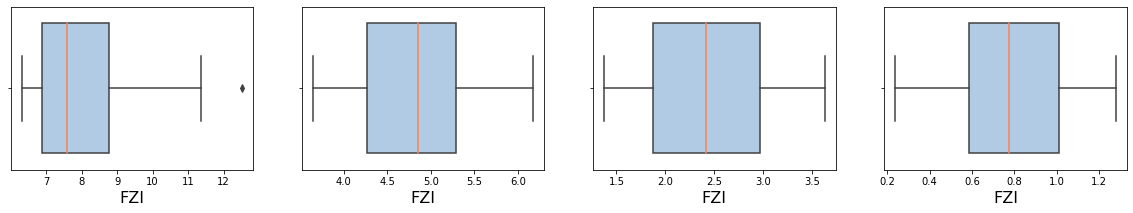

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
sns.boxplot(Unidad1["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16)
# plt.xticks(fontsize=16)

plt.subplot(1,4,2)
sns.boxplot(Unidad2["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16)
# plt.xticks(fontsize=16)

plt.subplot(1,4,3)
sns.boxplot(Unidad3["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16);
# plt.xticks(fontsize=16)

plt.subplot(1,4,4)
sns.boxplot(Unidad4["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16);
# plt.xticks(fontsize=16)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error ,r2_score

In [ ]:
XU1 = Unidad1["Poro_Core"].values.reshape(-1,1)
yU1 = np.log10(Unidad1["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba1 = np.log10(Unidad1["Poro_Core"]).values.reshape(-1,1)
yprueba1 = np.log10(Unidad1["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionU1=linear_model.LinearRegression()
linearRegressionU1.fit(XU1,yU1)
y_pred_U1=linearRegressionU1.predict(XU1)

In [ ]:
linearRegressionPrueba1=linear_model.LinearRegression()
linearRegressionPrueba1.fit(Xprueba1,yprueba1)
y_pred_prueba1=linearRegressionPrueba1.predict(Xprueba1)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba1.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba1.intercept_)
error=mean_squared_error(yprueba1,y_pred_prueba1)
print('Error: %.3f'%error)
var=r2_score(yprueba1,y_pred_prueba1)
print('R2: %.3f'%var)

Slope: 3.030
Intercept: 4.960
Error: 0.021
R2: 0.699


In [ ]:
print('Slope: %.3f'%linearRegressionU1.coef_[0])
print('Intercept: %.3f'%linearRegressionU1.intercept_)
error=mean_squared_error(yU1,y_pred_U1)
print('Error: %.3f'%error)
var=r2_score(yU1,y_pred_U1)
print('R2: %.3f'%var)

Slope: 9.201
Intercept: 1.066
Error: 0.022
R2: 0.684


In [ ]:
XU2 = Unidad2["Poro_Core"].values.reshape(-1,1)
yU2 = np.log10(Unidad2["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba2 = np.log10(Unidad2["Poro_Core"]).values.reshape(-1,1)
yprueba2 = np.log10(Unidad2["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba2=linear_model.LinearRegression()
linearRegressionPrueba2.fit(Xprueba2,yprueba2)
y_pred_prueb2=linearRegressionPrueba2.predict(Xprueba2)

In [ ]:
linearRegressionU2=linear_model.LinearRegression()
linearRegressionU2.fit(XU2,yU2)
y_pred_U2=linearRegressionU2.predict(XU2)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba2.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba2.intercept_)
error=mean_squared_error(yprueba2,y_pred_prueb2)
print('Error: %.3f'%error)
var=r2_score(yprueba2,y_pred_prueb2)
print('R2: %.3f'%var)

Slope: 3.200
Intercept: 4.678
Error: 0.015
R2: 0.899


In [ ]:
print('Slope: %.3f'%linearRegressionU2.coef_[0])
print('Intercept: %.3f'%linearRegressionU2.intercept_)
error=mean_squared_error(yU2,y_pred_U2)
print('Error: %.3f'%error)
var=r2_score(yU2,y_pred_U2)
print('R2: %.3f'%var)

Slope: 9.845
Intercept: 0.510
Error: 0.019
R2: 0.869


In [ ]:
XU3 = Unidad3["Poro_Core"].values.reshape(-1,1)
yU3 = np.log10(Unidad3["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba3 = np.log10(Unidad3["Poro_Core"]).values.reshape(-1,1)
yprueba3 = np.log10(Unidad3["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba3=linear_model.LinearRegression()
linearRegressionPrueba3.fit(Xprueba3,yprueba3)
y_pred_prueb3=linearRegressionPrueba3.predict(Xprueba3)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba3.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba3.intercept_)
error=mean_squared_error(yprueba3,y_pred_prueb3)
print('Error: %.3f'%error)
var=r2_score(yprueba3,y_pred_prueb3)
print('R2: %.3f'%var)

Slope: 3.209
Intercept: 4.067
Error: 0.057
R2: 0.670


In [ ]:
linearRegressionU3=linear_model.LinearRegression()
linearRegressionU3.fit(XU3,yU3)
y_pred_U3=linearRegressionU3.predict(XU3)

In [ ]:
print('Slope: %.3f'%linearRegressionU3.coef_[0])
print('Intercept: %.3f'%linearRegressionU3.intercept_)
error=mean_squared_error(yU3,y_pred_U3)
print('Error: %.3f'%error)
var=r2_score(yU3,y_pred_U3)
print('R2: %.3f'%var)

Slope: 9.949
Intercept: -0.110
Error: 0.055
R2: 0.678


In [ ]:
XU4 = Unidad4["Poro_Core"].values.reshape(-1,1)
yU4 = np.log10(Unidad4["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba4 = np.log10(Unidad4["Poro_Core"]).values.reshape(-1,1)
yprueba4 = np.log10(Unidad4["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba4=linear_model.LinearRegression()
linearRegressionPrueba4.fit(Xprueba4,yprueba4)
y_pred_prueb4=linearRegressionPrueba4.predict(Xprueba4)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba4.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba4.intercept_)
error=mean_squared_error(yprueba4,y_pred_prueb4)
print('Error: %.3f'%error)
var=r2_score(yprueba4,y_pred_prueb4)
print('R2: %.3f'%var)

Slope: 4.305
Intercept: 3.989
Error: 0.103
R2: 0.566


In [ ]:
linearRegressionU4=linear_model.LinearRegression()
linearRegressionU4.fit(XU4,yU4)
y_pred_U4=linearRegressionU4.predict(XU4)

In [ ]:
print('Slope: %.3f'%linearRegressionU4.coef_[0])
print('Intercept: %.3f'%linearRegressionU4.intercept_)
error=mean_squared_error(yU4,y_pred_U4)
print('Error: %.3f'%error)
var=r2_score(yU4,y_pred_U4)
print('R2: %.3f'%var)

Slope: 13.717
Intercept: -1.644
Error: 0.099
R2: 0.583


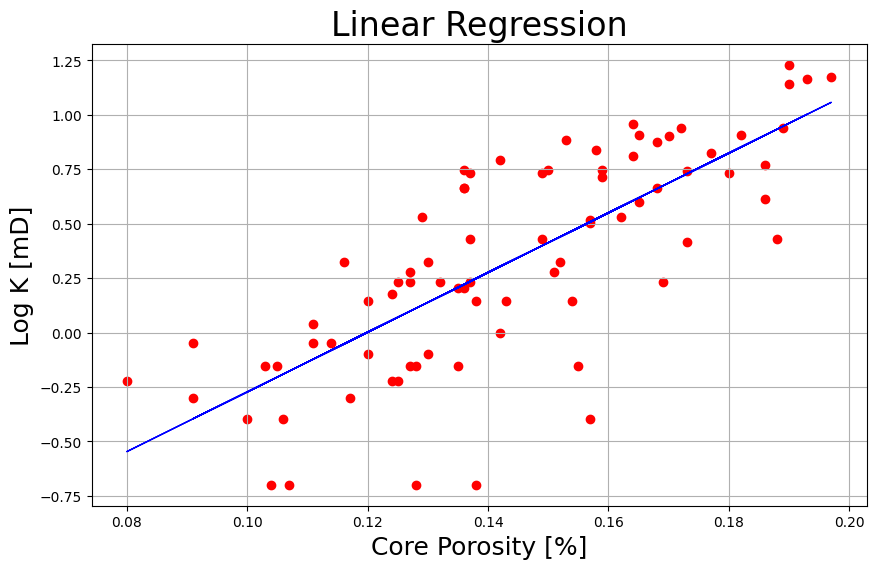

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(XU4,yU4,color="red")
plt.plot(XU4,y_pred_U4,color="blue",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("Log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

In [ ]:
i = 0
Porosidad_Lista = []
while i<=0.26:
    Porosidad_Lista.append(i)
    i = i + 0.010

In [ ]:
ECU1 = []
for i in Porosidad_Lista:
    a = 10**(4.960)*i**(3.030)
    ECU1.append(a)
ECU2 = []
for i in Porosidad_Lista:
    a = 10**(4.678)*i**(3.200)
    ECU2.append(a)
ECU3 = []
for i in Porosidad_Lista:
    a = 10**(4.067)*i**(3.209)
    ECU3.append(a)
ECU4 = []
for i in Porosidad_Lista:
    a = 10**(3.989)*i**(4.305)
    ECU4.append(a)

In [ ]:
dicc1 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU1}
dicc2 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU2}
dicc3 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU3}
dicc4 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU4}
ModeloPerm_U1 = pd.DataFrame(dicc1)
ModeloPerm_U2 = pd.DataFrame(dicc2)
ModeloPerm_U3 = pd.DataFrame(dicc3)
ModeloPerm_U4 = pd.DataFrame(dicc4)

<ipython-input-60-a1d5a0a25fca>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


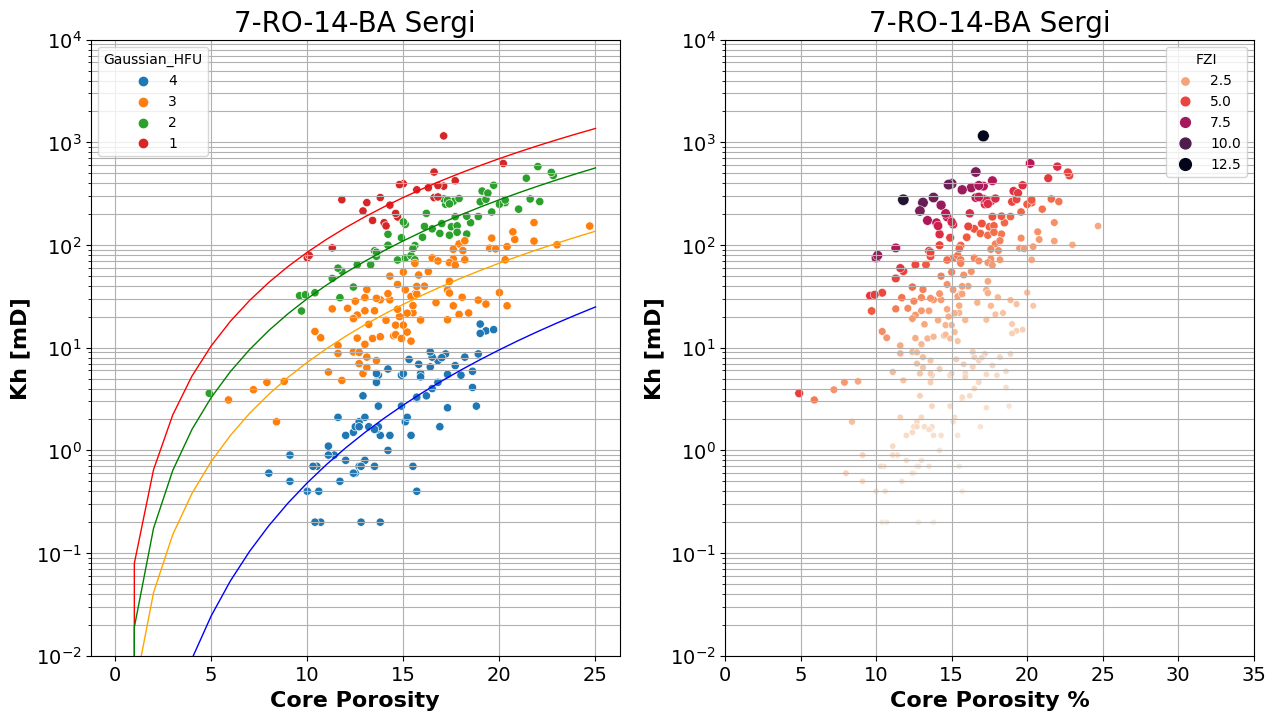

In [ ]:
fig , p = plt.subplots(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x=core_7RO['Poro_Core']*100,y=core_7RO["Kh_mD"],hue=core_7RO["Gaussian_HFU"])
plt.plot(ModeloPerm_U1["Porosidad"]*100,ModeloPerm_U1["Permeabilidad"],color="red",linewidth=1)
plt.plot(ModeloPerm_U2["Porosidad"]*100,ModeloPerm_U2["Permeabilidad"],color="green",linewidth=1)
plt.plot(ModeloPerm_U3["Porosidad"]*100,ModeloPerm_U3["Permeabilidad"],color="orange",linewidth=1)
plt.plot(ModeloPerm_U4["Porosidad"]*100,ModeloPerm_U4["Permeabilidad"],color="blue",linewidth=1)
plt.subplot(1,2,1).set_title("7-RO-14-BA Sergi",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Core Porosity", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).set_yscale(value="log")
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).set_ylim(0.01,10000)
# p.set_ylim(2040,1920)
plt.subplot(1,2,1).grid(which="both");

plt.subplot(1,2,2)
sns.scatterplot(x=core_7RO["Poro_Core"]*100,y=core_7RO["Kh_mD"],hue=core_7RO["FZI"],size=core_7RO["FZI"],palette="rocket_r")
plt.subplot(1,2,2).set_title("7-RO-14-BA Sergi",fontsize=20)
plt.subplot(1,2,2).set_xlabel("Core Porosity %", fontsize=16, fontweight="bold")
plt.subplot(1,2,2).set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
plt.subplot(1,2,2).semilogy()
plt.subplot(1,2,2).set_ylim(0.01,10000)
plt.subplot(1,2,2).set_xlim(0,35)
plt.subplot(1,2,2).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).grid(which="both");

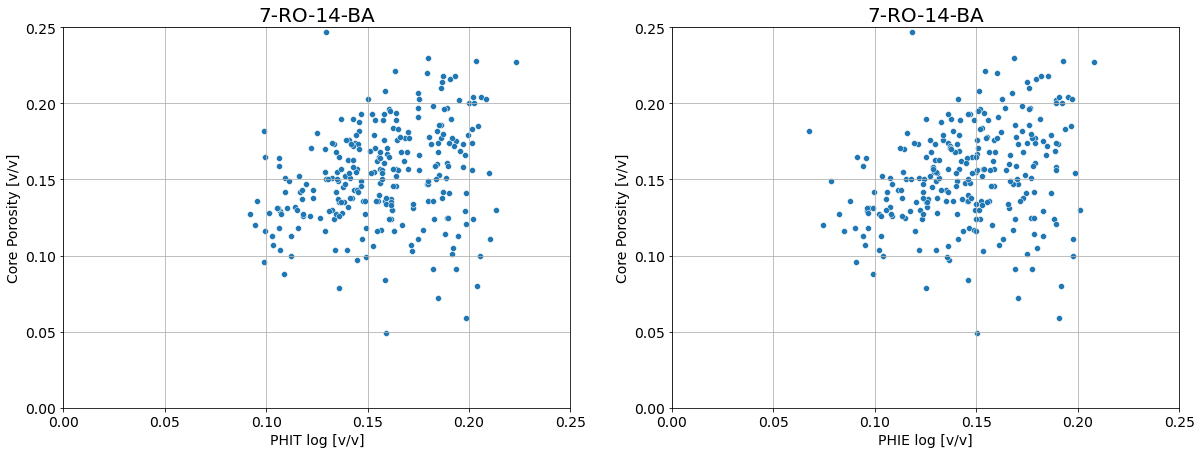

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
p = sns.scatterplot(x=Well_7RO['PHIT'],y=Well_7RO["Poro_Core"])
p.set_xlabel("PHIT log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.set_title("7-RO-14-BA",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlim(0,0.25)
p.set_ylim(0,0.25)
p.grid(which="both")

plt.subplot(1,2,2)
p = sns.scatterplot(x=Well_7RO['PHIE'],y=Well_7RO["Poro_Core"])
p.set_xlabel("PHIE log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.set_title("7-RO-14-BA",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlim(0,0.25)
p.set_ylim(0,0.25)
p.grid(which="both")

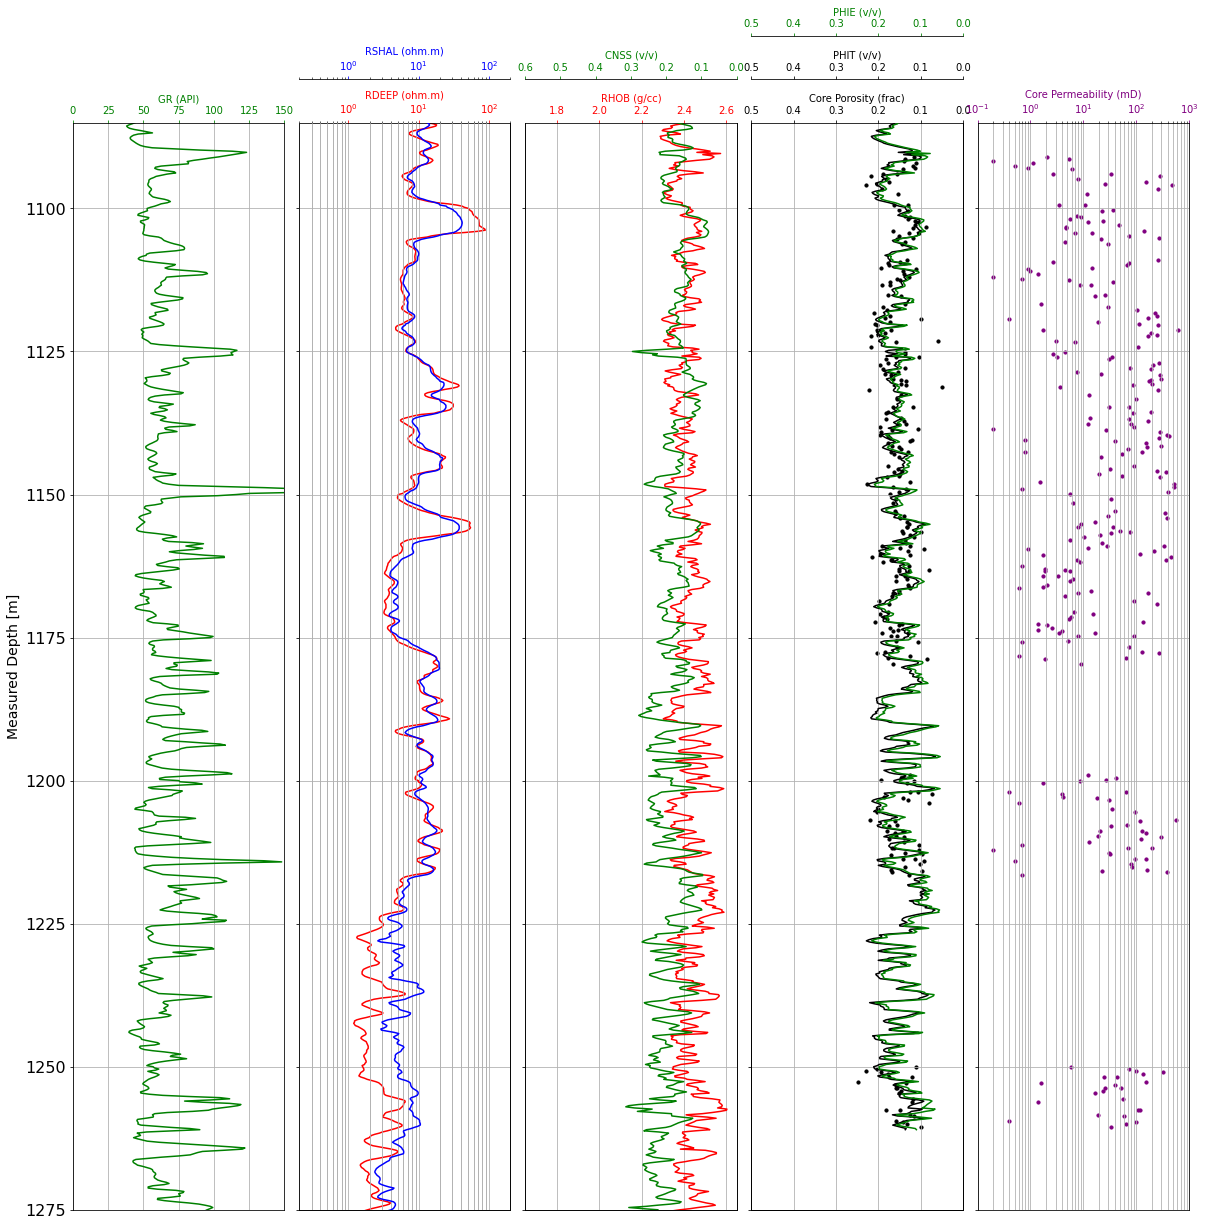

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(20,20),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax8 = ax6.twiny()
ax9 = ax6.twiny()
ax7 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

ax6.scatter("Poro_Core","MD",data=core_7RO,color="black",s=10)
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

ax7.scatter("Kh_mD","MD",data=core_7RO,color="purple",s=10)
ax7.semilogx()
ax7.set_xlim(0.1,1000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

ax8.plot("PHIT","MD",data=registro_7RO,color="black")
ax8.set_xlim(0.5,0)
ax8.set_xlabel("PHIT (v/v)",color="black")
ax8.tick_params(axis="x",colors="black")

ax9.plot("PHIE","MD",data=registro_7RO,color="green")
ax9.set_xlim(0.5,0)
ax9.set_xlabel("PHIE (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1085)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4 or i==6:
        ax.spines["top"].set_position(("axes",1.04))
    elif i==7:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.07)

#Machine Learning

##Regression

In [ ]:
Well_7RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         264 non-null    float64
 1   Poro_Core  264 non-null    float64
 2   Kh_mD      264 non-null    float64
 3   FZI        264 non-null    float64
 4   GR         264 non-null    float64
 5   CAL        264 non-null    float64
 6   VCL        264 non-null    float64
 7   RDEEP      264 non-null    float64
 8   RHOB       264 non-null    float64
 9   CNSS       264 non-null    float64
 10  DRHO       264 non-null    float64
 11  PHIT       264 non-null    float64
 12  PHIE       264 non-null    float64
dtypes: float64(13)
memory usage: 26.9 KB


Regresión Lineal

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]]
y_SER_Reg = Well_7RO["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Reg, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
multipleregressor = LinearRegression()
multipleregressor.fit(X_SER,y_SER_Reg) 

LinearRegression()

In [ ]:
y_multiple_pred = multipleregressor.predict(X_SER)

In [ ]:
error=mean_squared_error(y_SER_Reg,y_multiple_pred)
print('Error: %.3f'%error)
var=r2_score(y_SER_Reg,y_multiple_pred)
print('R2: %.3f'%var)

Error: 0.132
R2: 0.049


In [ ]:
y_SER_Reg = y_SER_Reg.tolist()
y_multiple_pred = y_multiple_pred.tolist()

In [ ]:
df = pd.DataFrame({'FZI Original':y_SER_Reg, 'FZI Prediction': y_multiple_pred})

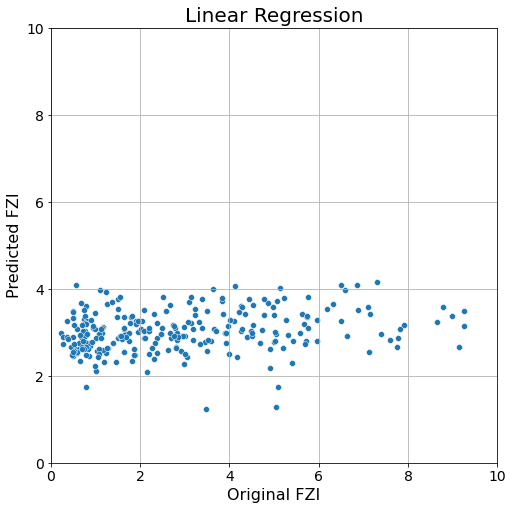

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=df['FZI Original'],y=df['FZI Prediction'])
p.set_title("Linear Regression",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

SVR

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]].values
y_SER_Reg = Well_7RO["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Reg, test_size = 0.3, random_state = 42)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_SER)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
param_grid = [
  {'C': [0.25, 0.5, 1, 5, 10, 20], 'kernel': ['linear']},
  {'C': [0.25, 0.5, 1,5,10,20], 'kernel': ['rbf']}
 ]

In [ ]:
GridS = GridSearchCV(SVR(),
                     param_grid,
                     scoring= "r2",
                     cv=5).fit(X_train_scaled,y_train)
best_accuracy = GridS.best_score_
best_parameters = GridS.best_params_
print("Best R2: {:.02f}".format(best_accuracy))
print("Best Parameters: ", best_parameters)

Best R2: 0.01
Best Parameters:  {'C': 0.5, 'kernel': 'linear'}


In [ ]:
SVR_model = Pipeline([
    ("Escalar", StandardScaler()),
    ("SVR", SVR(C=0.5,kernel="linear"))
])

In [ ]:
SVR_model.fit(X_train,y_train)

Pipeline(steps=[('Escalar', StandardScaler()),
                ('SVR', SVR(C=0.5, kernel='linear'))])

In [ ]:
y_pred_SVR = SVR_model.predict(X_test)
r2_score(y_test,y_pred_SVR)

-0.22337022611036095

In [ ]:
mean_squared_error(y_test,y_pred_SVR)

6.874910402235683

In [ ]:
SVR_X = cross_val_score(SVR(C=0.5,kernel="linear"), X_train_scaled, y_train, scoring="r2",cv = 10)
print("R2: {:.02f}".format(SVR_X.mean()))
print("Standard Deviation: {:.02f} %".format(SVR_X.std()*100))

R2: -0.06
Standard Deviation: 24.12 %


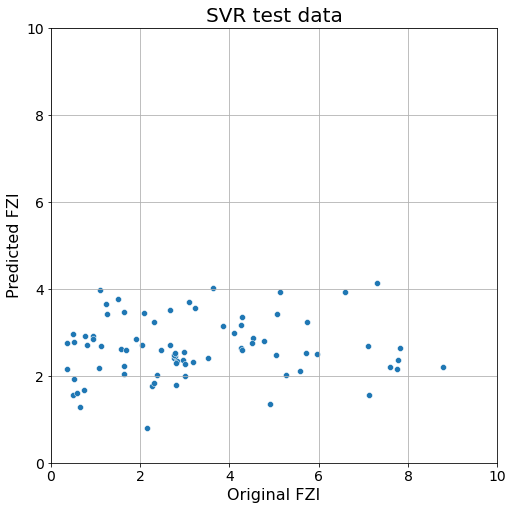

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=y_test,y=y_pred_SVR)
p.set_title("SVR test data",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

Random Forest Regressor

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]].values
y_SER_Reg = Well_7RO["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Reg, test_size = 0.3, random_state = 42)

In [ ]:
param_grid = [{
    "n_estimators":[1,2,3,4,5,6,7,8,9,10,12,14,16,20,30,50], 
    "max_features":[1,2,3,4]
}]
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),param_grid,cv=10,scoring="r2",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [1, 2, 3, 4],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                           14, 16, 20, 30, 50]}],
             return_train_score=True, scoring='r2')

In [ ]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 50}

In [ ]:
grid_search.best_score_

-0.180289323852648

In [ ]:
reg_forest = grid_search.best_estimator_

In [ ]:
y_pred_RFR = reg_forest.predict(X_test)

In [ ]:
error=mean_squared_error(y_test,y_pred_RFR)
print('Error: %.3f'%error)
var=r2_score(y_test,y_pred_RFR)
print('R2: %.3f'%var)

Error: 6.206
R2: -0.104


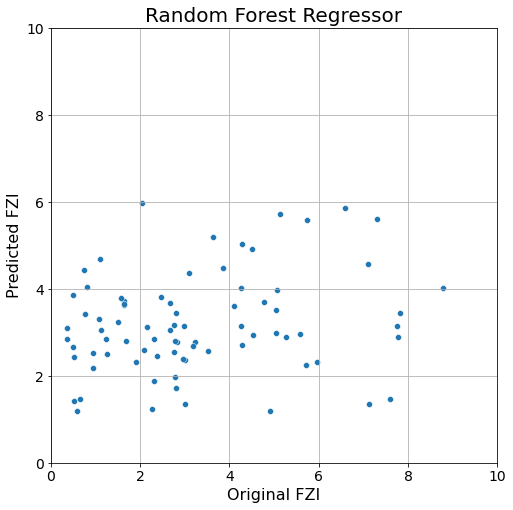

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=y_test,y=y_pred_RFR)
p.set_title("Random Forest Regressor",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


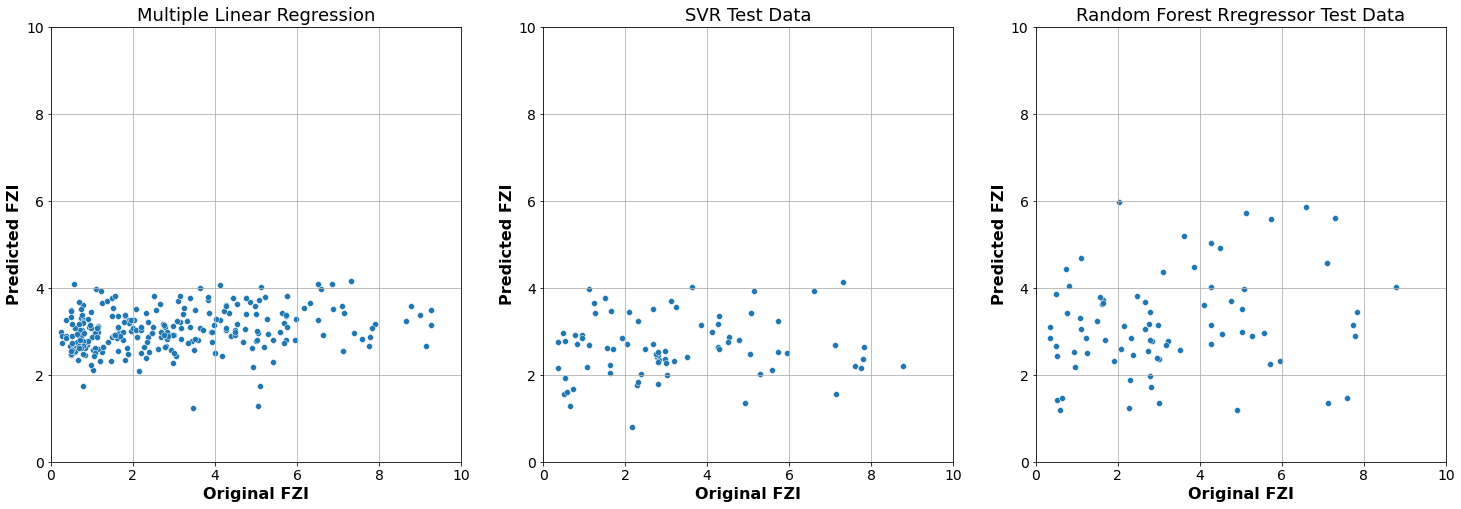

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
sns.scatterplot(x=df['FZI Original'],y=df['FZI Prediction'])
plt.subplot(1,3,1).set_title("Multiple Linear Regression",fontsize=18)
plt.subplot(1,3,1).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,1).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,1).set_ylim(0,10)
plt.subplot(1,3,1).set_xlim(0,10)
plt.subplot(1,3,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,1).grid(which="both")

plt.subplot(1,3,2)
sns.scatterplot(y_test,y_pred_SVR)
plt.subplot(1,3,2).set_title("SVR Test Data",fontsize=18)
plt.subplot(1,3,2).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,2).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,2).set_ylim(0,10)
plt.subplot(1,3,2).set_xlim(0,10)
plt.subplot(1,3,2).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,2).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,2).grid(which="both")


plt.subplot(1,3,3)
sns.scatterplot(y_test,y_pred_RFR)
plt.subplot(1,3,3).set_title("Random Forest Rregressor Test Data",fontsize=18)
plt.subplot(1,3,3).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,3).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,3).set_ylim(0,10)
plt.subplot(1,3,3).set_xlim(0,10)
plt.subplot(1,3,3).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,3).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,3).grid(which="both")

##Classification

SVM

In [ ]:
X_CORE3D = Well_7RO[["FZI"]]
Well_7RO["Gaussian_HFU"] = gmm.predict(X_CORE3D)

<ipython-input-280-a33d6d1e0f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Well_7RO["Gaussian_HFU"] = gmm.predict(X_CORE3D)


In [ ]:
core7HFU = {2:4,1:3,3:2,0:1}
Well_7RO = Well_7RO.replace({"Gaussian_HFU":core7HFU})

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]]
y_SER_Cla = Well_7RO["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Cla, test_size = 0.2, random_state = 0)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_SER)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
SVC_1 = SVC(class_weight="balanced")
SVC_1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = [
  {'C': [0.25, 0.5 ,1, 5, 10, 15,20], 'kernel': ['linear']},
  {'C': [0.25, 0.5, 1, 10, 100, 1000], 'kernel': ['rbf']},
 ]

In [ ]:
BusquedaSVM = GridSearchCV(SVC_1,
                     param_grid,
                     scoring= "accuracy",
                     cv=10).fit(X_train_scaled,y_train)
best_accuracy = BusquedaSVM.best_score_
best_parameters = BusquedaSVM.best_params_
print("Best Accuracy: {:.02f}".format(best_accuracy))
print("Best Parameters: ", best_parameters)

Best Accuracy: 0.43
Best Parameters:  {'C': 1, 'kernel': 'rbf'}


In [ ]:
BusquedaSVM.cv_results_["mean_test_score"]

array([0.35541126, 0.35995671, 0.36471861, 0.36926407, 0.36926407,
       0.36926407, 0.36926407, 0.40281385, 0.42186147, 0.42662338,
       0.33160173, 0.35562771, 0.35974026])

In [ ]:
clf = BusquedaSVM.best_estimator_
y_pred_clf = clf.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           1       0.38      0.60      0.46         5
           2       0.35      0.58      0.44        12
           3       0.53      0.38      0.44        21
           4       0.50      0.33      0.40        15

    accuracy                           0.43        53
   macro avg       0.44      0.47      0.44        53
weighted avg       0.47      0.43      0.43        53



In [ ]:
multilabel_confusion_matrix(y_test, y_pred_clf)

array([[[43,  5],
        [ 2,  3]],

       [[28, 13],
        [ 5,  7]],

       [[25,  7],
        [13,  8]],

       [[33,  5],
        [10,  5]]])

In [ ]:
RegistroSergi = registro_7RO[(1090<=registro_7RO["MD"]) & (registro_7RO["MD"]<=1261)]

In [ ]:
Registros = RegistroSergi[["GR","CNSS","RHOB"]]
Registros_escalados = scx.transform(Registros)
Pozo1_Predicción_SVC = clf.predict(Registros_escalados)
Pozo1_Predicción_SVC = np.asfarray(Pozo1_Predicción_SVC)
RegistroSergi["Predicted SVC"] = Pozo1_Predicción_SVC

<ipython-input-293-96b4d48a5fe5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegistroSergi["Predicted SVC"] = Pozo1_Predicción_SVC


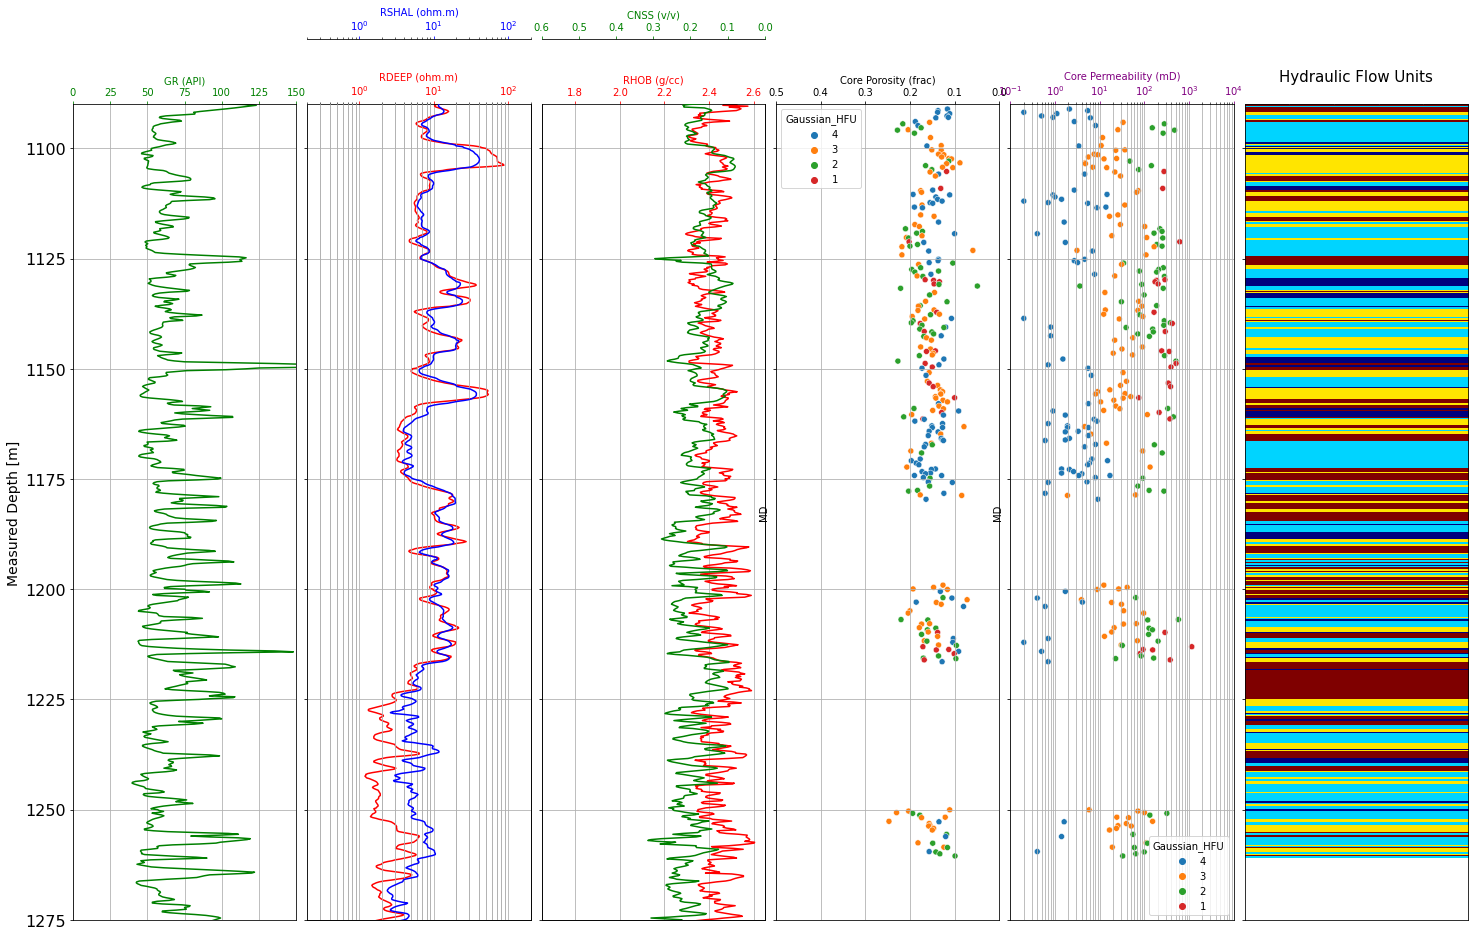

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax6 = sns.scatterplot(x=core_7RO["Poro_Core"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax7 = sns.scatterplot(x=core_7RO["Kh_mD"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax7.semilogx()
ax7.set_xlim(0.1,10000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

HFU = np.vstack(RegistroSergi['Predicted SVC'])
ax8.imshow(HFU, aspect='auto', extent=[0,1,max(RegistroSergi['MD']), min(RegistroSergi['MD'])],cmap="jet",vmin=1,vmax=4,
            interpolation="none")
ax8.set_title('Hydraulic Flow Units', fontsize='15')
ax8.grid(which="both")
ax8.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

Text(0.5, 1.0, 'Log')

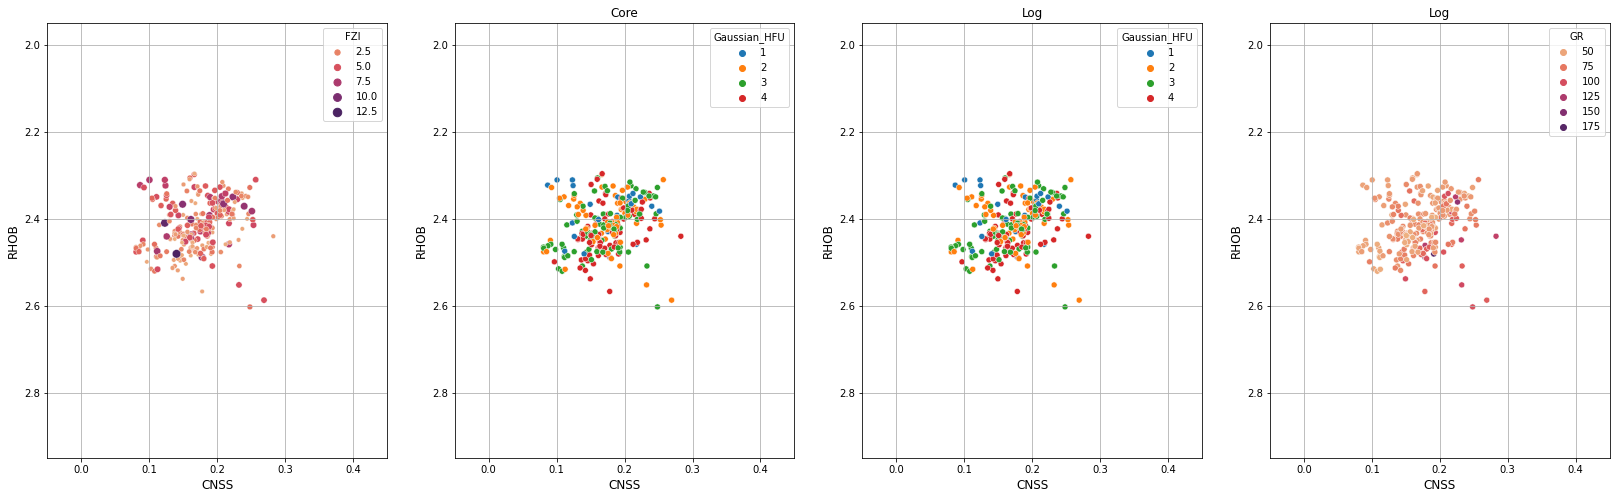

In [ ]:
plt.figure(figsize=(28,8))

plt.subplot(1,4,1)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["FZI"],size=Well_7RO["FZI"],palette="flare")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(1,4,1).grid()
plt.subplot(1,4,1).set_xlabel("CNSS", fontsize=12)
plt.subplot(1,4,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,1).set_ylim(2.950,1.950)
plt.subplot(1,4,1).set_xlim(-0.05,0.45)

plt.subplot(1,4,2)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["Gaussian_HFU"],palette="tab10")
plt.subplot(1,4,2).grid()
plt.subplot(1,4,2).set_xlabel("CNSS", fontsize=12)
plt.subplot(1,4,2).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,2).set_ylim(2.950,1.950)
plt.subplot(1,4,2).set_xlim(-0.05,0.45)
plt.subplot(1,4,2).set_title("Core")

plt.subplot(1,4,3)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["Gaussian_HFU"],palette="tab10")
plt.subplot(1,4,3).grid()
plt.subplot(1,4,3).set_xlabel("CNSS", fontsize=12)
plt.subplot(1,4,3).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,3).set_ylim(2.950,1.950)
plt.subplot(1,4,3).set_xlim(-0.05,0.45)
plt.subplot(1,4,3).set_title("Log")

plt.subplot(1,4,4)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["GR"],palette="flare")
plt.subplot(1,4,4).grid()
plt.subplot(1,4,4).set_xlabel("CNSS", fontsize=12)
plt.subplot(1,4,4).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,4).set_ylim(2.950,1.950)
plt.subplot(1,4,4).set_xlim(-0.05,0.45)
plt.subplot(1,4,4).set_title("Log")

Random Forest

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]]
y_SER_Cla = Well_7RO["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Cla, test_size = 0.2, random_state = 10)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_SER)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
RFC = RandomForestClassifier()
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = [{
    "n_estimators":[5,6,7,8,9,10,15,20,30,50,60,70,80], 
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [2,3]
}]

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=0,class_weight="balanced"),param_grid,cv=5,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid=[{'max_features': [2, 3],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                          'n_estimators': [5, 6, 7, 8, 9, 10, 15, 20, 30, 50,
                                           60, 70, 80]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 5}

In [ ]:
grid_search.best_score_

0.45060908084163903

In [ ]:
RFC_grid = grid_search.best_estimator_
y_pred_RFC = RFC_grid.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           1       0.22      0.33      0.27         6
           2       0.14      0.08      0.10        13
           3       0.53      0.53      0.53        19
           4       0.56      0.67      0.61        15

    accuracy                           0.43        53
   macro avg       0.36      0.40      0.37        53
weighted avg       0.41      0.43      0.41        53



In [ ]:
multilabel_confusion_matrix(y_test, y_pred_RFC)

array([[[40,  7],
        [ 4,  2]],

       [[34,  6],
        [12,  1]],

       [[25,  9],
        [ 9, 10]],

       [[30,  8],
        [ 5, 10]]])

In [ ]:
X_new = scx.transform(RegistroSergi[["GR","CNSS","RHOB"]])

In [ ]:
Pozo1_Predicción = RFC_grid.predict(X_new)
Pozo1_Predicción = np.asfarray(Pozo1_Predicción)
RegistroSergi["Predicted RFC"] = Pozo1_Predicción

<ipython-input-308-ca6b5077bcc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegistroSergi["Predicted RFC"] = Pozo1_Predicción


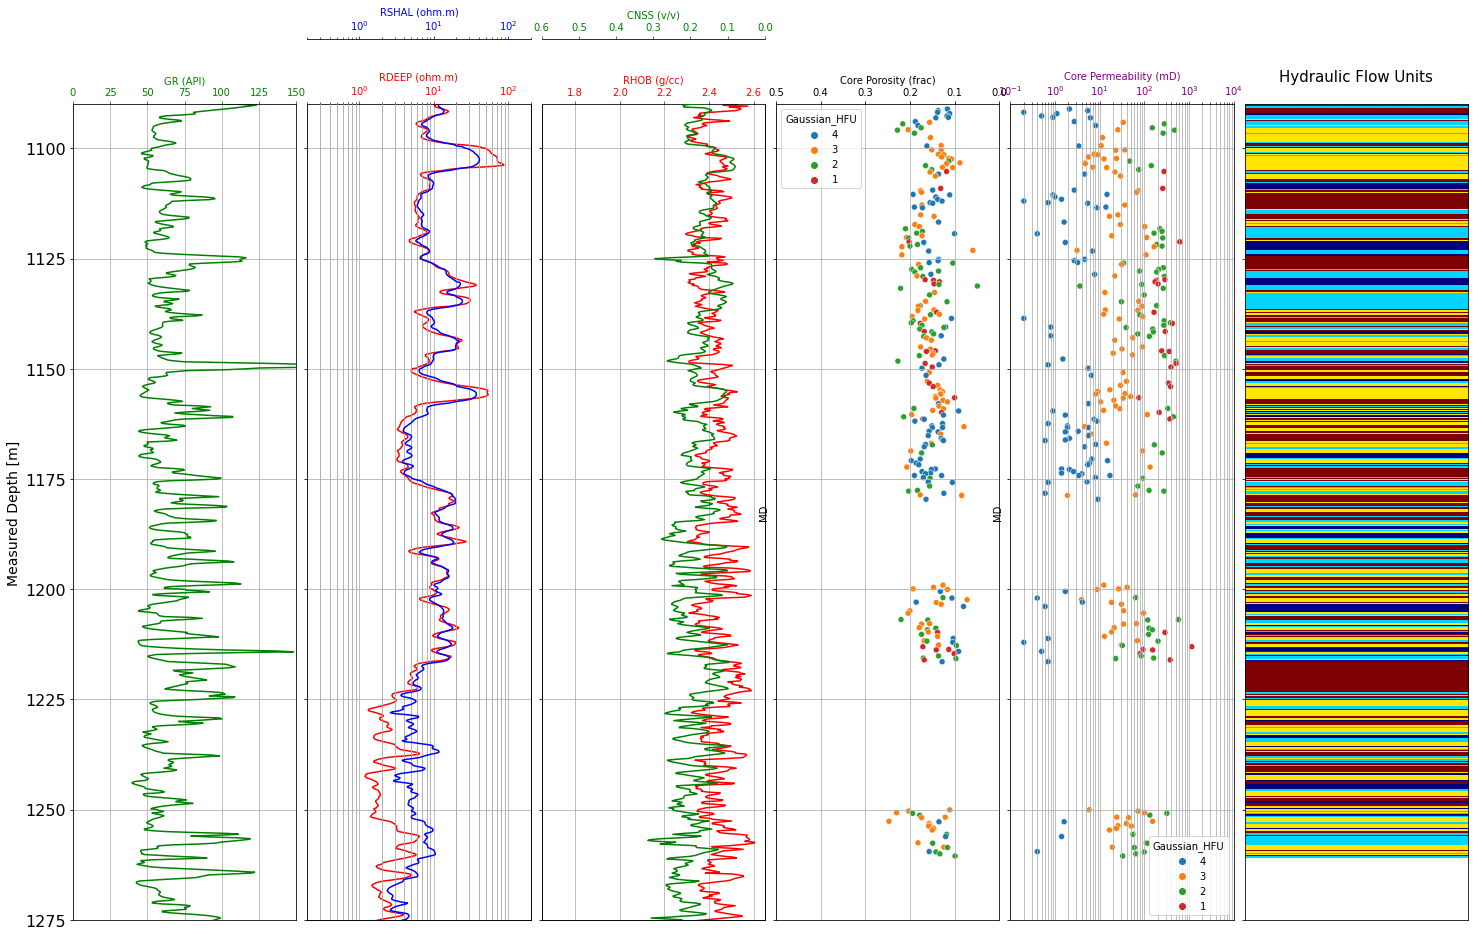

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax6 = sns.scatterplot(x=core_7RO["Poro_Core"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax7 = sns.scatterplot(x=core_7RO["Kh_mD"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax7.semilogx()
ax7.set_xlim(0.1,10000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

HFU = np.vstack(RegistroSergi['Predicted RFC'])
ax8.imshow(HFU, aspect='auto', extent=[0,1,max(RegistroSergi['MD']), min(RegistroSergi['MD'])],cmap="jet",vmin=1,vmax=4,
            interpolation="none")
ax8.set_title('Hydraulic Flow Units', fontsize='15')
ax8.grid(which="both")
ax8.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

Gradient Boost

In [ ]:
core7HFU = {1:0,2:1,3:2,4:3}
Well_7RO = Well_7RO.replace({"Gaussian_HFU":core7HFU})

In [ ]:
X_SER = Well_7RO[["GR","CNSS","RHOB"]]
y_SER_Cla = Well_7RO["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SER, y_SER_Cla, test_size = 0.2, random_state = 10)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_SER)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
param_test1 = [
    {'n_estimators':range(10,100,5)}
]

In [ ]:
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,random_state=10), 
param_grid = param_test1, cv=5)
gsearch1.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, ...),
             param_grid=[{'n_estimators': range(10, 100, 5)}])

In [ ]:
gsearch1.best_params_

{'n_estimators': 25}

In [ ]:
gsearch1.best_score_

0.43599114064230343

In [ ]:
xgb_CLA = gsearch1.best_estimator_
y_pred_xgb = xgb_CLA.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.56      0.38      0.45        13
           2       0.57      0.63      0.60        19
           3       0.50      0.67      0.57        15

    accuracy                           0.53        53
   macro avg       0.49      0.46      0.46        53
weighted avg       0.52      0.53      0.51        53



In [ ]:
X_new = scx.transform(RegistroSergi[["GR","CNSS","RHOB"]])

In [ ]:
Pozo1_Predicción_GB = xgb_CLA.predict(X_new)
Pozo1_Predicción_GB = np.asfarray(Pozo1_Predicción_GB)
RegistroSergi["Predicted XGB"] = Pozo1_Predicción_GB

<ipython-input-320-0f865394c099>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegistroSergi["Predicted XGB"] = Pozo1_Predicción_GB


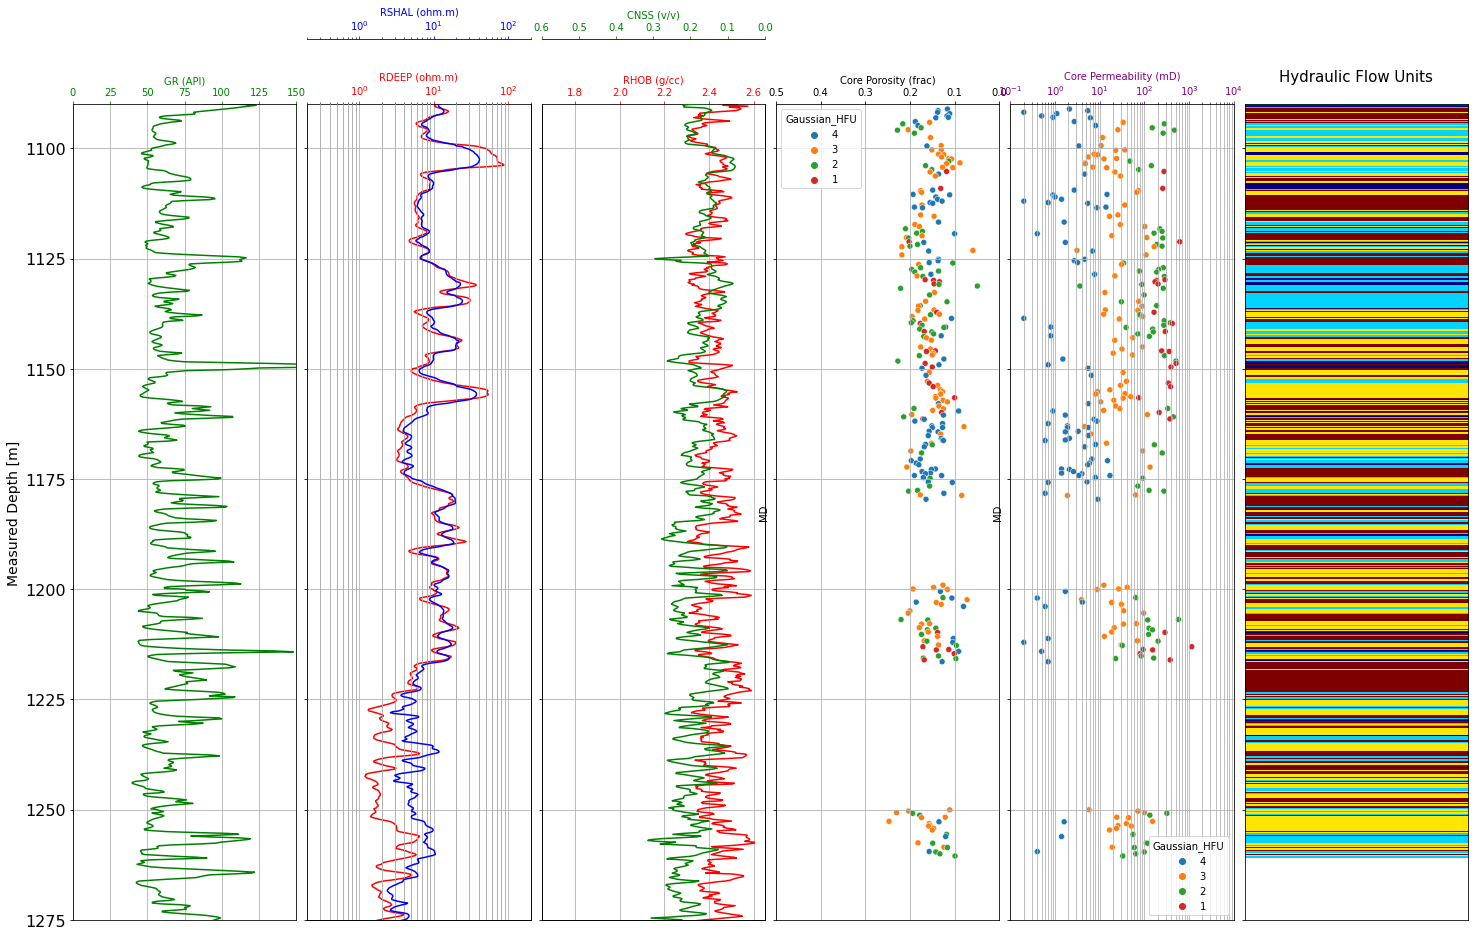

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax6 = sns.scatterplot(x=core_7RO["Poro_Core"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax7 = sns.scatterplot(x=core_7RO["Kh_mD"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax7.semilogx()
ax7.set_xlim(0.1,10000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

HFU = np.vstack(RegistroSergi['Predicted XGB'])
ax8.imshow(HFU, aspect='auto', extent=[0,1,max(RegistroSergi['MD']), min(RegistroSergi['MD'])],cmap="jet",vmin=0,vmax=3,
            interpolation="none")
ax8.set_title('Hydraulic Flow Units', fontsize='15')
ax8.grid(which="both")
ax8.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##Clustering

In [ ]:
X_SER_CLUS = Well_7RO[["GR","CNSS","RHOB"]]

In [ ]:
X_SER_CLUS_scaled = scx.transform(X_SER_CLUS)

In [ ]:
core7HFU = {0:1,1:2,2:3,3:4}
Well_7RO = Well_7RO.replace({"Gaussian_HFU":core7HFU})
y_true = Well_7RO["Gaussian_HFU"].values

In [ ]:
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_model.fit(X_SER_CLUS_scaled)
y_pred_kmeans = kmeans_model.predict(scx.transform(Well_7RO[["GR","CNSS","RHOB"]]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_true

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 3, 2, 2, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 4, 3, 1, 4, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2, 2, 4, 3, 3, 2, 1, 4, 2, 2,
       3, 3, 4, 3, 4, 4, 4, 2, 3, 2, 2, 2, 2, 4, 3, 2, 1, 1, 1, 1, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 3, 4, 3, 2, 2, 1, 2, 4, 2, 2,
       1, 2, 2, 4, 2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 4, 2, 1, 4, 1, 4, 3, 4,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 4, 3, 2, 3, 3, 4, 1, 3, 4,
       2, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 4, 3, 2,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 3, 3,
       4, 3, 3, 3, 3, 4, 2, 4, 3, 4, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3, 2, 2,
       3, 1, 2, 3, 4, 3, 2, 4, 3, 2, 1, 1, 1, 4, 1, 2, 2, 2, 1, 4, 3, 3,
       3, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 2, 4, 2, 2, 2])

In [ ]:
y_pred_kmeans

array([0, 0, 2, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1],
      dtype=int32)

In [ ]:
y_pred_kmeans

array([0, 0, 2, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1],
      dtype=int32)

In [ ]:
y_pred_kmeans = pd.DataFrame(y_pred_kmeans,columns=["HFU_KMeans"])
KMeansHFU = {0:4,2:3,3:2,1:1}
y_pred_kmeans = y_pred_kmeans.replace({"HFU_KMeans":KMeansHFU})
y_pred_kmeans = y_pred_kmeans["HFU_KMeans"].values

In [ ]:
print(classification_report(y_true, y_pred_kmeans))

              precision    recall  f1-score   support

           1       0.10      0.40      0.16        25
           2       0.37      0.22      0.28        63
           3       0.46      0.44      0.45        96
           4       0.52      0.20      0.29        80

    accuracy                           0.31       264
   macro avg       0.36      0.31      0.29       264
weighted avg       0.42      0.31      0.33       264



In [ ]:
RegistroSergi["Kmeans"] = kmeans_model.predict(scx.transform(RegistroSergi[["GR","CNSS","RHOB"]]))

In [ ]:
RegistroSergi["Kmeans"]

589     1
590     1
591     1
592     1
593     1
       ..
1440    2
1441    2
1442    2
1443    1
1444    1
Name: Kmeans, Length: 856, dtype: int32

In [ ]:
KMeansHFU = {0:1,1:2,2:3,3:4}
RegistroSergi = RegistroSergi.replace({"Kmeans":KMeansHFU})

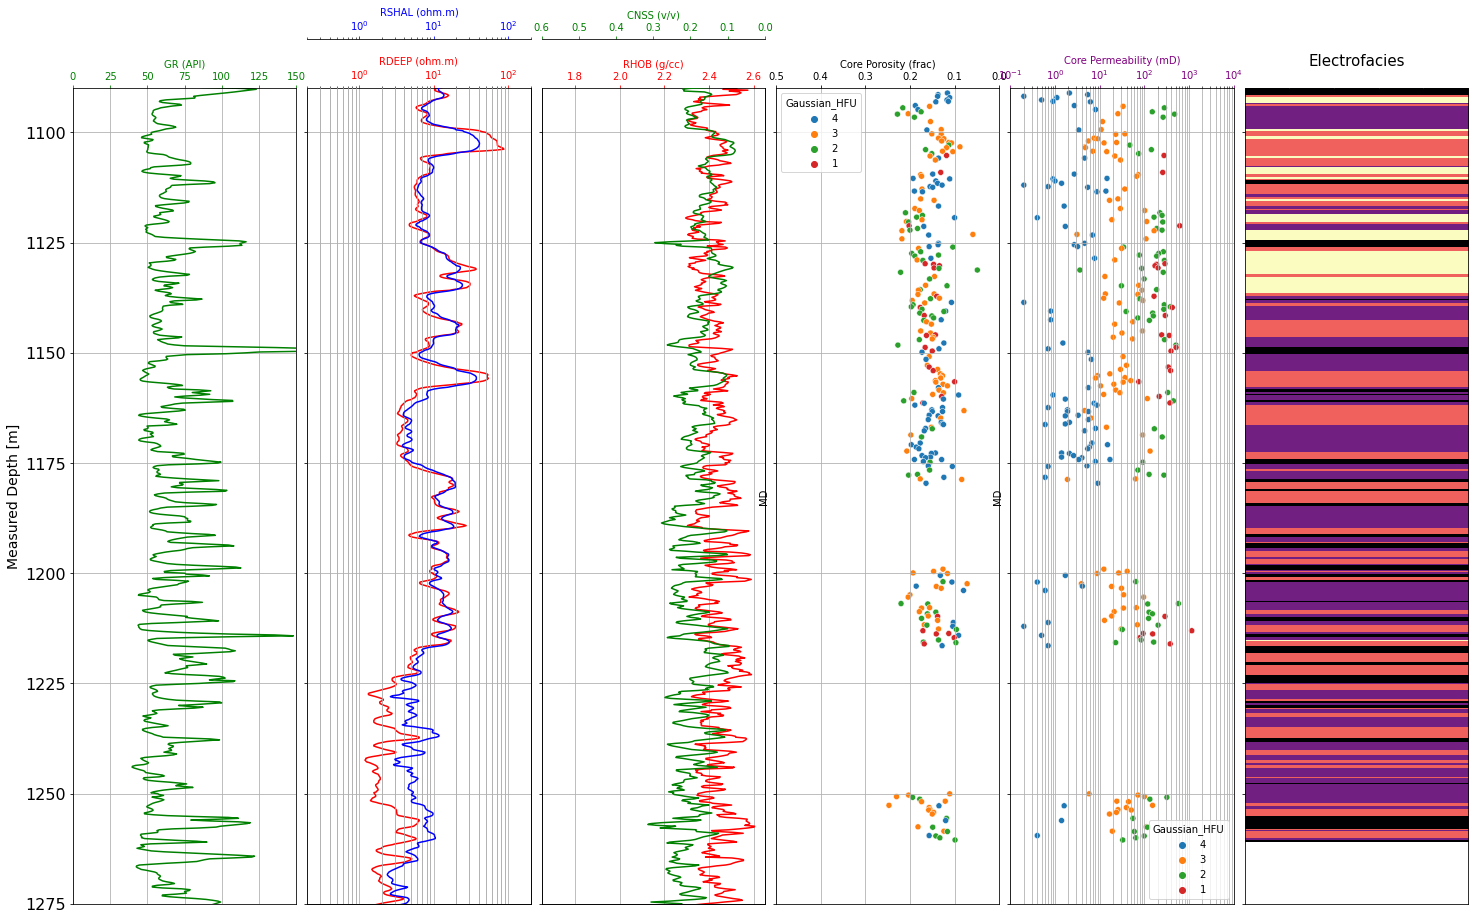

In [ ]:
import enum
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax7 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax8 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7RO,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot("RDEEP","MD",data=registro_7RO,color="red")
ax2.set_xlim(0.2,200)
ax2.semilogx()
ax2.grid(which="minor")
ax2.set_xlabel("RDEEP (ohm.m)",color="red")
ax2.tick_params(axis="x",colors="red")

ax3.plot("RSHAL","MD",data=registro_7RO,color="blue")
ax3.set_xlim(0.2,200)
ax3.semilogx()
ax3.grid(which="minor")
ax3.set_xlabel("RSHAL (ohm.m)",color="blue")
ax3.tick_params(axis="x",colors="blue")

ax4.plot("RHOB","MD",data=registro_7RO,color="red")
ax4.set_xlim(1.65,2.65)
ax4.grid(which="minor")
ax4.set_xlabel("RHOB (g/cc)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("CNSS","MD",data=registro_7RO,color="green")
ax5.set_xlim(0.6,0)
ax5.set_xlabel("CNSS (v/v)",color="green")
ax5.tick_params(axis="x",colors="green")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax6 = sns.scatterplot(x=core_7RO["Poro_Core"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax6.set_xlabel("Core Porosity (frac)",color="black")
ax6.tick_params(axis="x",colors="black")
ax6.set_xlim(0.5,0)

plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax7 = sns.scatterplot(x=core_7RO["Kh_mD"],y=core_7RO["MD"],hue=core_7RO["Gaussian_HFU"],palette="tab10")
ax7.semilogx()
ax7.set_xlim(0.1,10000)
ax7.grid(which="minor")
ax7.set_xlabel("Core Permeability (mD)",color="purple")
ax7.tick_params(axis="x",colors="purple")

HFU = np.vstack(RegistroSergi['Kmeans'])
ax8.imshow(HFU, aspect='auto', extent=[0,1,max(RegistroSergi['MD']), min(RegistroSergi['MD'])],cmap="magma",vmin=1,vmax=4,
            interpolation="none")
ax8.set_title('Electrofacies', fontsize='15')
ax8.grid(which="both")
ax8.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1275,1090)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==2 or i==4:
        ax.spines["top"].set_position(("axes",1.06))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
RegistroSergi.describe()

,MD,GR,CAL,SP,VCL,RSHAL,RDEEP,RHOB,CNSS,DRHO,PHIT,PHIE,Predicted SVC,Predicted RFC,Predicted XGB,Kmeans
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,1175.500000,66.205352,9.597293,-64.064472,0.278788,10.972963,10.855683,2.427553,0.178911,0.035386,0.154831,0.143093,2.664720,2.824766,2.008178,1.406542
std,49.450042,18.477998,0.216568,15.480699,0.076810,7.111819,12.309442,0.064727,0.042463,0.020578,0.033542,0.034055,0.968978,1.020099,0.893736,0.874943
min,1090.000000,39.734000,9.276000,-102.508000,0.104100,2.617900,1.191000,2.294999,0.079900,-0.004000,0.064600,0.053300,1.000000,1.000000,0.000000,0.000000
25%,1132.750000,53.840000,9.480000,-73.041000,0.225100,6.140650,4.099000,2.375000,0.148600,0.022000,0.131050,0.118450,2.000000,2.000000,1.000000,1.000000
50%,1175.500000,61.011000,9.558000,-64.420000,0.260400,8.917450,7.100500,2.426000,0.178200,0.033000,0.156150,0.145000,3.000000,3.000000,2.000000,1.000000
75%,1218.250000,73.647750,9.683000,-52.665000,0.315700,13.553725,12.680500,2.471999,0.209700,0.045000,0.183025,0.170900,3.250000,4.000000,3.000000,2.000000
max,1261.000000,201.254000,11.376000,-30.408000,0.573200,41.181100,87.774000,2.603999,0.314600,0.206000,0.228100,0.215600,4.000000,4.000000,3.000000,3.000000


In [ ]:
X_CORE3D = Well_7RO[["FZI"]]
Well_7RO["Gaussian_HFU"] = gmm.predict(X_CORE3D)

In [ ]:
Well_7RO["Gaussian_HFU"]

0      3
1      3
2      3
3      3
4      3
      ..
259    4
260    3
261    4
262    4
263    4
Name: Gaussian_HFU, Length: 264, dtype: int64

In [ ]:
core7HFU = {0:1,1:2,2:3,3:4}
Well_7RO = Well_7RO.replace({"Gaussian_HFU":core7HFU})

Text(0.5, 1.0, '7-RO-14-BA Core')

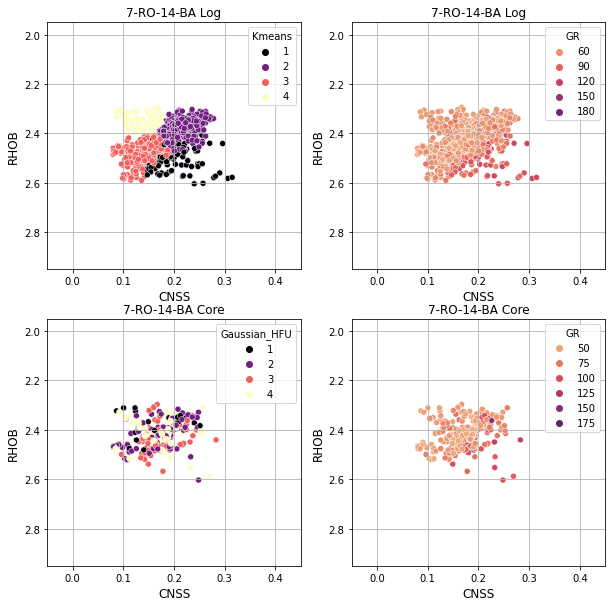

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x=RegistroSergi['CNSS'],y=RegistroSergi['RHOB'],hue=RegistroSergi["Kmeans"],palette="magma")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(2,2,1).grid()
plt.subplot(2,2,1).set_xlabel("CNSS", fontsize=12)
plt.subplot(2,2,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,1).set_ylim(2.950,1.950)
plt.subplot(2,2,1).set_xlim(-0.05,0.45)
plt.subplot(2,2,1).set_title("7-RO-14-BA Log")

plt.subplot(2,2,2)
sns.scatterplot(x=RegistroSergi['CNSS'],y=RegistroSergi['RHOB'],hue=RegistroSergi["GR"],palette="flare")
plt.subplot(2,2,2).grid()
plt.subplot(2,2,2).set_xlabel("CNSS", fontsize=12)
plt.subplot(2,2,2).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,2).set_ylim(2.950,1.950)
plt.subplot(2,2,2).set_xlim(-0.05,0.45)
plt.subplot(2,2,2).set_title("7-RO-14-BA Log")

plt.subplot(2,2,3)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["Gaussian_HFU"],palette="magma")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(2,2,3).grid()
plt.subplot(2,2,3).set_xlabel("CNSS", fontsize=12)
plt.subplot(2,2,3).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,3).set_ylim(2.950,1.950)
plt.subplot(2,2,3).set_xlim(-0.05,0.45)
plt.subplot(2,2,3).set_title("7-RO-14-BA Core")

plt.subplot(2,2,4)
sns.scatterplot(x=Well_7RO['CNSS'],y=Well_7RO['RHOB'],hue=Well_7RO["GR"],palette="flare")
plt.subplot(2,2,4).grid()
plt.subplot(2,2,4).set_xlabel("CNSS", fontsize=12)
plt.subplot(2,2,4).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,4).set_ylim(2.950,1.950)
plt.subplot(2,2,4).set_xlim(-0.05,0.45)
plt.subplot(2,2,4).set_title("7-RO-14-BA Core")